# Here we combine our extended taxonomy for high quality prokaryotic genomes from 7 parts into one dataframe

In [1]:
import pandas as pd
from glob import glob
import numpy as np

# Importing genomic metadata

In [2]:
df_sel_col = pd.read_pickle("77334_prokaryotes_full_metadata.pkl")

## Exploring all genera Genome size vs COG%

In [3]:
df_sel_col_mt1M = df_sel_col[df_sel_col['Genome Size   * assembled'] >= 1000000].copy()

In [4]:
df_sel_col_mt1M.sort_values('Genome Size   * assembled')

Domain Sequencing Status  \
taxon_oid                                
2585427846  Bacteria   Permanent Draft   
2786546280  Bacteria   Permanent Draft   
2634166872  Bacteria   Permanent Draft   
2698536773   Archaea             Draft   
2785510830  Bacteria   Permanent Draft   
...              ...               ...   
648276680   Bacteria          Finished   
2831769015  Bacteria   Permanent Draft   
2841205229  Bacteria          Finished   
2563366597  Bacteria          Finished   
2721755703  Bacteria          Finished   

                                                   Study Name  \
taxon_oid                                                       
2585427846             Candidatus Photodesmus katoptron Akat8   
2786546280  Development of a pipeline for high-throughput ...   
2634166872  Bacterial and archaeal communities from variou...   
2698536773  Acid mine drainage (AMD) solution archaeal com...   
2785510830  Development of a pipeline for high-throughput ...   
...                                                       ...   
648276680   A Genomic Encyclopedia of Bacteria and Archaea...   
2831769015    Vitiosangium sp. GDMCC 1.1324 Genome sequencing   
2841205229    Sorangium cellulosum So ce836 genome sequencing   
2563366597                      Sorangium cellulosum So0157-2   
2721755703       Minicystis rosea DSM 24000 Genome sequencing   

                                    Genome Name / Sample Name  \
taxon_oid                                                       
2585427846             Candidatus Photodesmus katoptron Akat8   
2786546280  Candidatus Magasanikbacteria bacterium CG_4_9_...   
2634166872             Bacterium SCGC AD-698-F20 (unscreened)   
2698536773              Micrarchaeota archaeon_LR.AMD.A.bin.1   
2785510830  Parcubacteria bacterium CG10_big_fil_rev_8_21_...   
...                                                       ...   
648276680         Ktedonobacter racemifer SOSP1-21, DSM 44963   
2831769015                      Vitiosangium sp. GDMCC 1.1324   
2841205229                      Sorangium cellulosum So ce836   
2563366597                      Sorangium cellulosum So0157-2   
2721755703                         Minicystis rosea DSM 24000   

                                            Sequencing Center  IMG Genome ID   \
taxon_oid                                                                       
2585427846                             University of Michigan      2585427846   
2786546280                   DOE Joint Genome Institute (JGI)      2786546280   
2634166872  Bigelow Laboratory Single Cell Genomics Center...      2634166872   
2698536773                                       BGI-shenzhen      2698536773   
2785510830                   DOE Joint Genome Institute (JGI)      2785510830   
...                                                       ...             ...   
648276680                    DOE Joint Genome Institute (JGI)       648276680   
2831769015                Guangdong Institute of Microbiology      2831769015   
2841205229            Helmholtz Centre for Infection Research      2841205229   
2563366597                                Shandong University      2563366597   
2721755703  Institute of Microbial Technology (IMTECH), Co...      2721755703   

                                  Phylum                Class  \
taxon_oid                                                       
2585427846                Proteobacteria  Gammaproteobacteria   
2786546280  Candidatus Magasanikbacteria         unclassified   
2634166872                  unclassified         unclassified   
2698536773      Candidatus Micrarchaeota         unclassified   
2785510830                  unclassified         unclassified   
...                                  ...                  ...   
648276680                    Chloroflexi      Ktedonobacteria   
2831769015                Proteobacteria  Deltaproteobacteria   
2841205229                Proteobacteria  Deltaproteobacteria   
256336

In [5]:

by_gen = np.array((df_sel_col_mt1M.groupby('Genus')))

In [6]:
by_phyl = np.array((df_sel_col_mt1M.groupby('Phylum')))

In [7]:
len(by_gen[0][1])

1

In [8]:
len(by_gen)

2747

In [9]:
sum(list(map(lambda x: len(x[1])>10, by_gen)))

465

## Genera with more than 10 members

In [10]:
by_gen_mt10 = by_gen[list(map(lambda x: len(x[1])>10, by_gen))].copy()

In [11]:
len(by_gen_mt10)

465

In [12]:
len(by_gen)

2747

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [14]:
by_gen[12][0]

'Acetobacter'

In [15]:
by_gen_mt10[0][0]

'Acetobacter'

In [16]:
by_gen_mt10[0][1]['Genome Size   * assembled']

taxon_oid
2816332478    4139662
646862304     3336990
2713897234    3442751
2854536247    4047831
2854576727    2724937
               ...   
2516653054    3690768
2576861739    3014502
2579778976    3166244
2828617574    3324960
651324000     2883421
Name: Genome Size   * assembled, Length: 81, dtype: int64

In [17]:
by_gen_mt10[0][1]['COG %   * assembled']

taxon_oid
2816332478    63.44
646862304     63.31
2713897234    64.68
2854536247    69.54
2854576727    73.75
              ...  
2516653054    66.67
2576861739    66.30
2579778976    46.49
2828617574    69.40
651324000     71.42
Name: COG %   * assembled, Length: 81, dtype: float64

## Let's exlplore Acidithiobacillus

In [18]:
acidithiobacillus = by_gen_mt10[list(map(lambda x: x[0] == 'Acidithiobacillus' , by_gen_mt10))].copy()

In [19]:
acidithiobacillus

array([['Acidithiobacillus',
                      Domain Sequencing Status  \
taxon_oid                                
2811995036  Bacteria          Finished   
2838915312  Bacteria   Permanent Draft   
2838918683  Bacteria   Permanent Draft   
2811994996  Bacteria   Permanent Draft   
650716003   Bacteria          Finished   
2684622546  Bacteria   Permanent Draft   
643348501   Bacteria          Finished   
642555101   Bacteria          Finished   
2571042229  Bacteria   Permanent Draft   
2840828123  Bacteria   Permanent Draft   
2744054820  Bacteria   Permanent Draft   
2843368346  Bacteria   Permanent Draft   
2510461056  Bacteria   Permanent Draft   
2811995294  Bacteria          Finished   
2773857961  Bacteria   Permanent Draft   
2617271221  Bacteria   Permanent Draft   
2751185777  Bacteria   Permanent Draft   
2510436001  Bacteria          Finished   
2811995293  Bacteria          Finished   
2824077352  Bacteria          Finished   

                                      

In [20]:
proteobacteria = by_phyl[list(map(lambda x: x[0] == 'Proteobacteria' , by_phyl))].copy()

In [21]:
proteobacteria

array([['Proteobacteria',
                      Domain Sequencing Status  \
taxon_oid                                
2718218273  Bacteria          Finished   
2770939588  Bacteria   Permanent Draft   
2845783465  Bacteria   Permanent Draft   
2770939550  Bacteria   Permanent Draft   
2747842866  Bacteria   Permanent Draft   
...              ...               ...   
2541047249  Bacteria   Permanent Draft   
2747842889  Bacteria   Permanent Draft   
2849726789  Bacteria   Permanent Draft   
2663763365  Bacteria          Finished   
2565956825  Bacteria   Permanent Draft   

                                                   Study Name  \
taxon_oid                                                       
2718218273  Genome sequencing of epidemic-associated Neiss...   
2770939588  Genomic Encyclopedia of Type Strains, Phase II...   
2845783465  Bovine respiratory disease (BRD) relevant bact...   
2770939550  Genomic Encyclopedia of Type Strains, Phase IV...   
2747842866  Genomic study of 

0.02070144373511197


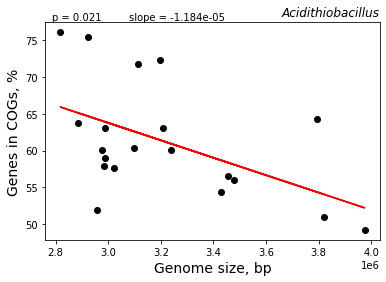

In [22]:
figs={}
axs={}

for idx, grp in enumerate(acidithiobacillus):
    x = grp[1]['Genome Size   * assembled']
    y = grp[1]['COG %   * assembled']
    genus = grp[0]
    
    figs[idx]=plt.figure()
    axs[idx]=figs[idx].add_subplot(111)
    
    axs[idx].scatter(x, y, c='k')
    axs[idx].set_title(genus, loc='right', style='italic')
    axs[idx].set_xlabel("Genome size, bp", size=14)
    axs[idx].set_ylabel("Genes in COGs, %", size=14)
    
    
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(p_value)
    axs[idx].plot(x, intercept + slope*x, 'r')
    axs[idx].text(0.02, 1, 'p = ' +  str(np.round(p_value, 3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[idx].transAxes)
    axs[idx].text(0.25, 1, 'slope = ' +  str(np.format_float_scientific(slope, precision=3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[idx].transAxes)
    
    
    
    


In [23]:
acidithiobacillus[0][1]

Domain Sequencing Status  \
taxon_oid                                
2811995036  Bacteria          Finished   
2838915312  Bacteria   Permanent Draft   
2838918683  Bacteria   Permanent Draft   
2811994996  Bacteria   Permanent Draft   
650716003   Bacteria          Finished   
2684622546  Bacteria   Permanent Draft   
643348501   Bacteria          Finished   
642555101   Bacteria          Finished   
2571042229  Bacteria   Permanent Draft   
2840828123  Bacteria   Permanent Draft   
2744054820  Bacteria   Permanent Draft   
2843368346  Bacteria   Permanent Draft   
2510461056  Bacteria   Permanent Draft   
2811995294  Bacteria          Finished   
2773857961  Bacteria   Permanent Draft   
2617271221  Bacteria   Permanent Draft   
2751185777  Bacteria   Permanent Draft   
2510436001  Bacteria          Finished   
2811995293  Bacteria          Finished   
2824077352  Bacteria          Finished   

                                                   Study Name  \
taxon_oid                                                       
2811995036                 Acidithiobacillus ferrivorans CF27   
2838915312  Acidithiobacillus ferrooxidans CCM 4253 genome...   
2838918683  Acidithiobacillus thiooxidans ZBY genome seque...   
2811994996                 Acidithiobacillus thiooxidans CLST   
650716003                       Acidithiobacillus caldus SM-1   
2684622546  Acidithiobacillus ferrooxidans genome sequenci...   
643348501           Acidithiobacillus ferrooxidans ATCC 23270   
642555101           Acidithiobacillus ferrooxidans ATCC 53993   
2571042229                  Acidithiobacillus thiooxidans A01   
2840828123       Acidithiobacillus sp. CJ-2 genome sequencing   
2744054820   Acidithiobacillus ferrooxidans genome sequencing   
2843368346  Acidithiobacillus ferrooxidans YQH-1 genome se...   
2510461056           Acidithiobacillus thiooxidans ATCC 19377   
2811995294                Acidithiobacillus caldus ATCC 51756   
2773857961  Acidithiobacillus ferrivorans YL15 Genome sequ...   
2617271221                 Acidithiobacillus ferrivorans CF27   
2751185777            Acidithiobacillus albertensis DSM 14366   
2510436001  Whole genome sequencing of a psychrotolerant A...   
2811995293         Acidithiobacillus caldus genome sequencing   
2824077352            Acidithiobacillus ferridurans JCM 18981   

                            Genome Name / Sample Name  \
taxon_oid                                               
2811995036         Acidithiobacillus ferrivorans CF27   
2838915312    Acidithiobacillus ferrooxidans CCM 4253   
2838918683          Acidithiobacillus thiooxidans ZBY   
2811994996         Acidithiobacillus thiooxidans CLST   
650716003               Acidithiobacillus caldus SM-1   
2684622546       Acidithiobacillus ferrooxidans Hel18   
643348501   Acidithiobacillus ferrooxidans ATCC 23270   
642555101   Acidithiobacillus ferrooxidans ATCC 53993   
2571042229          Acidithiobacillus thiooxidans A01   
2840828123                 Acidithiobacillus sp. CJ-2   
2744054820      Acidithiobacillus ferrooxidans BY0502   
2843368346       Acidithiobacillus ferrooxidans YQH-1   
2510461056   Acidithiobacillus thiooxidans ATCC 19377   
2811995294        Acidithiobacillus caldus ATCC 51756   
2773857961         Acidithiobacillus ferrivorans YL15   
2617271221         Acidithiobacillus ferrivorans CF27   
2751185777    Acidithiobacillus albertensis DSM 14366   
2510436001          Acidithiobacillus ferrivorans SS3   
2811995293            Acidithiobacillus caldus MTH-04   
2824077352   Acidithiobacillus ferrooxidans JCM 18981   

                                           Sequencing Center  IMG Genome ID   \
taxon_oid                                                                      
2811995036                                     CEA Genoscope      2811995036   
2838915312                                Masaryk University      2838915312   
2838918683                          Central South University      2838918683   
281

In [24]:
acidithiobacillus[0][1].to_csv("genus_acidithiobacillus_jgi_metadata.tsv", sep="\t", index=False)

## Plotting entire Proteobacteria

7.140791955800908e-221


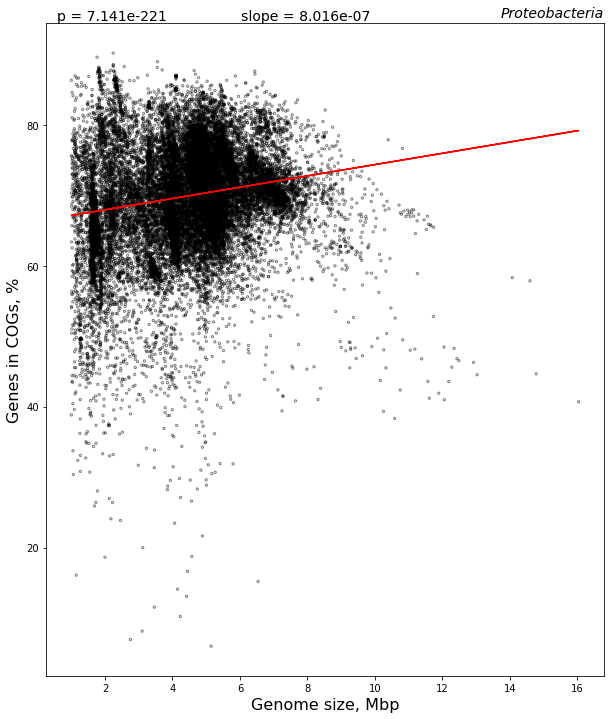

In [26]:
figs={}
axs={}

for idx, grp in enumerate(proteobacteria):
    x = grp[1]['Genome Size   * assembled']/(10**6)
    y = grp[1]['COG %   * assembled']
    genus = grp[0]
    
    figs[idx]=plt.figure(figsize=(10, 12))
    
    axs[idx]=figs[idx].add_subplot(111)
    
    axs[idx].scatter(x, y, s=5, facecolors='none', edgecolors='k', alpha=0.5)
    axs[idx].set_title(genus, loc='right', style='italic',  size=14)
    axs[idx].set_xlabel("Genome size, Mbp", size=16, )
    axs[idx].set_ylabel("Genes in COGs, %", size=16, )
    
    
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(p_value)
    axs[idx].plot(x, intercept + slope*x, 'r')
    axs[idx].text(0.02, 1, 'p = ' +  str(np.format_float_scientific(p_value, precision=3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[idx].transAxes,  size=14)
    axs[idx].text(0.35, 1, 'slope = ' +  str(np.format_float_scientific(slope/(10**6), precision=3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[idx].transAxes, size=14)
plt.savefig('all_proteobact.pdf')
plt.savefig('all_proteobact.png',dpi=150)
plt.savefig('all_proteobact.svg')
plt.savefig('all_proteobact.tiff',dpi=150)


## Plotting first 10 genera

0.0002675572806294667
0.5365147439459941
0.6728963901486107
0.8139510369551737
0.174881866674416
0.02070144373511197
0.4548666841316159
5.4407043882218195e-21
0.4516964819421879
0.30185074662743916


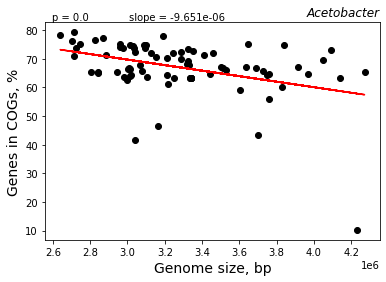

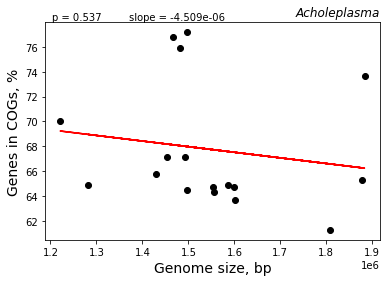

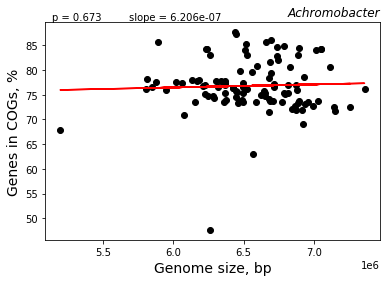

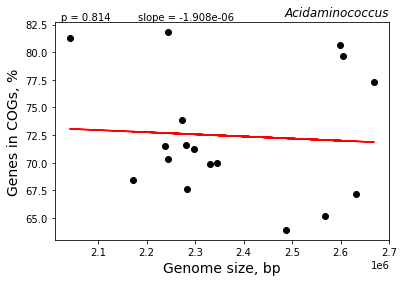

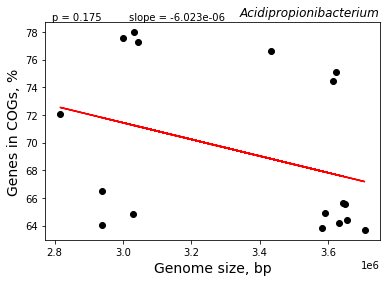

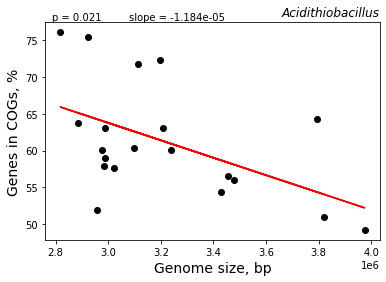

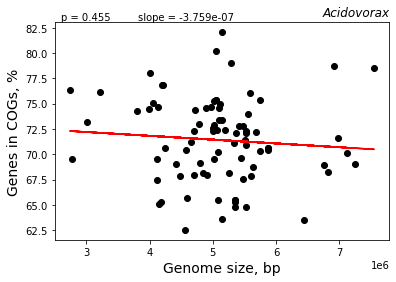

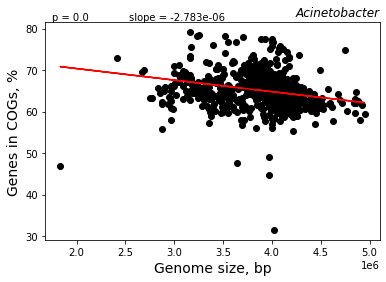

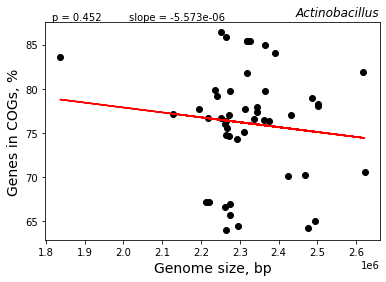

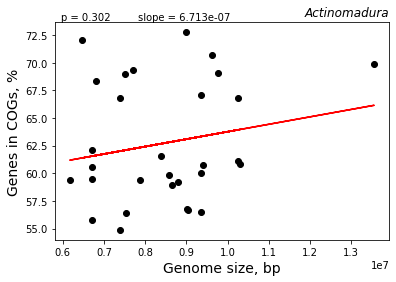

In [27]:
figs={}
axs={}

for idx, grp in enumerate(by_gen_mt10[:10]):
    x = grp[1]['Genome Size   * assembled']
    y = grp[1]['COG %   * assembled']
    genus = grp[0]
    
    figs[idx]=plt.figure()
    axs[idx]=figs[idx].add_subplot(111)
    
    axs[idx].scatter(x, y, c='k')
    axs[idx].set_title(genus, loc='right', style='italic')
    axs[idx].set_xlabel("Genome size, bp", size=14)
    axs[idx].set_ylabel("Genes in COGs, %", size=14)
    
    
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(p_value)
    axs[idx].plot(x, intercept + slope*x, 'r')
    axs[idx].text(0.02, 1, 'p = ' +  str(np.round(p_value, 3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[idx].transAxes)
    axs[idx].text(0.25, 1, 'slope = ' +  str(np.format_float_scientific(slope, precision=3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[idx].transAxes)
    
    
    
    


## Let's narrow the scope by Proteobacteria

In [28]:
list(map(lambda x: x[1]['Phylum'].any() == 'Proteobacteria' , by_gen_mt10))

[True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 

In [29]:
by_gen_mt10_proteobact = by_gen_mt10[list(map(lambda x: x[1]['Phylum'].any() == 'Proteobacteria' , by_gen_mt10))].copy()

In [30]:
len(by_gen_mt10_proteobact)

213

In [31]:
by_gen_proteobact = by_gen[list(map(lambda x: x[1]['Phylum'].any() == 'Proteobacteria' , by_gen))].copy()

In [32]:
len(by_gen_proteobact)

1113

## By-genus plots: working version

In [33]:
import string
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [34]:
letters = list(string.ascii_uppercase)

In [35]:
import itertools

In [36]:
double_letters = list(map(lambda x: "".join(x), itertools.product(letters, letters)))

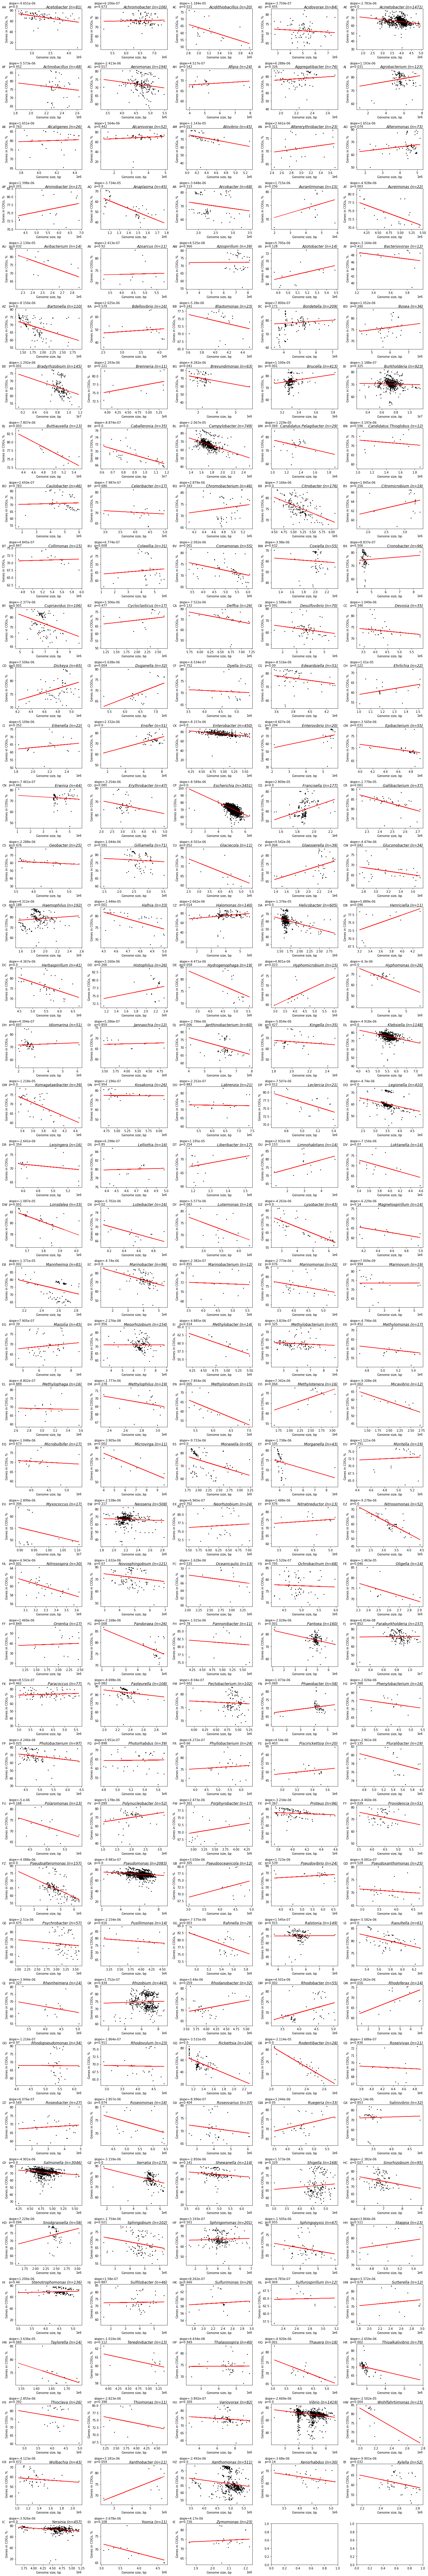

In [37]:
import math

data = by_gen_mt10_proteobact
PLOTS_PER_ROW = 5
series = []

i,j=0,0
fig, axs = plt.subplots(math.ceil(len(data)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 120))
for grp, dbl_lttr in zip(data, double_letters):
    x = grp[1]['Genome Size   * assembled']
    y = grp[1]['COG %   * assembled']
    genus = grp[0]
    n = len(grp[1])
    
    phylum = grp[1]['Phylum'].any()
    cls = grp[1]['Class'].any()
    order = grp[1]['Order'].any()
    family = grp[1]['Family'].any()
    min_cog_pc = grp[1]['COG %   * assembled'].min()
    max_cog_pc = grp[1]['COG %   * assembled'].max()
    avg_gen_sz = grp[1]['Genome Size   * assembled'].mean()
    avg_gene_count = grp[1]['Gene Count   * assembled'].mean()
    avg_genes_in_cogs = grp[1]['COG %   * assembled'].mean()
    avg_crispr = grp[1]['CRISPR Count   * assembled'].mean()
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ind =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Sample Size', 'Min COG %', 'Max COG %',
           'Average Genome Size', 'Average Gene Count', 'Average Genes in COG',
           'Average CRISPRs', 'Slope', 'Intercept', 'R squared', 'p-value', 'Standard Error']
    series.append(pd.Series([phylum, cls, order, family, genus, n, min_cog_pc, max_cog_pc,
                             avg_gen_sz, avg_gene_count, avg_genes_in_cogs, 
                             avg_crispr, slope, intercept, r_value**2, p_value, std_err], index=ind))
    
    axs[i][j].scatter(x, y, s=3, c='k')
    axs[i][j].set_title(genus+" (n="+str(n)+")", loc='right', style='italic', y=0.97)
    axs[i][j].set_xlabel("Genome size, bp")
    axs[i][j].set_ylabel("Genes in COGs, %")
    axs[i][j].plot(x, intercept + slope*x, 'r')
    axs[i][j].text(-0.1, 1.01, 'p=' +  str(np.round(p_value, 3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
    axs[i][j].text(-0.1, 1.09, 'slope=' +  str(np.format_float_scientific(slope, precision=3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
    axs[i][j].text(-0.2, 1, dbl_lttr, horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
        
    #print(p_value)

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

fig.tight_layout()
plt.savefig('by_gen_mt10_proteobact_size_vs_cogs.pdf')
plt.show()

## Exploring the summary

In [39]:
summary_by_gen_mt10_proteobact_size_vs_cogs = pd.DataFrame(series)
summary_by_gen_mt10_proteobact_size_vs_cogs

Phylum                Class                Order  \
0    Proteobacteria  Alphaproteobacteria     Rhodospirillales   
1    Proteobacteria   Betaproteobacteria      Burkholderiales   
2    Proteobacteria    Acidithiobacillia  Acidithiobacillales   
3    Proteobacteria   Betaproteobacteria      Burkholderiales   
4    Proteobacteria  Gammaproteobacteria      Pseudomonadales   
..              ...                  ...                  ...   
208  Proteobacteria  Gammaproteobacteria     Enterobacterales   
209  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
210  Proteobacteria  Gammaproteobacteria     Enterobacterales   
211  Proteobacteria  Alphaproteobacteria      Rhodobacterales   
212  Proteobacteria  Alphaproteobacteria     Sphingomonadales   

                   Family              Genus  Sample Size  Min COG %  \
0        Acetobacteraceae        Acetobacter           81      10.21   
1          Alcaligenaceae      Achromobacter          106      47.65   
2    Acidithiobacillaceae  Acidithiobacillus           20      49.21   
3          Comamonadaceae         Acidovorax           84      62.52   
4           Moraxellaceae      Acinetobacter         1471      31.47   
..                    ...                ...          ...        ...   
208        Morganellaceae        Xenorhabdus           30      44.10   
209      Xanthomonadaceae            Xylella           52      50.91   
210          Yersiniaceae           Yersinia          457      13.07   
211      Rhodobacteraceae             Yoonia           11      65.01   
212     Sphingomonadaceae          Zymomonas           23      62.52   

     Max COG %  Average Genome Size  Average Gene Count  Average Genes in COG  \
0        79.31         3.280073e+06         3208.037037             67.042222   
1        87.63         6.552113e+06         6105.867925             76.806698   
2        76.09         3.216657e+06         3411.550000             61.193500   
3        82.05         5.094687e+06         4730.964286             71.405357   
4        79.10         3.934670e+06         3885.984364             64.962978   
..         ...                  ...                 ...                   ...   
208      74.20         4.300185e+06         4095.533333             64.155667   
209      69.70         2.589933e+06         2587.480769             60.817308   
210      80.13         4.534027e+06         4271.336980             73.078621   
211      78.92         3.753692e+06         3795.909091             69.380000   
212      82.36         2.087501e+06         1887.521739             74.511739   

     Average CRISPRs         Slope  Intercept  R squared       p-value  \
0           1.172840 -9.651425e-06  98.699604   0.155673  2.675573e-04   
1           0.509434  6.206317e-07  72.740249   0.001721  6.728964e-01   
2           1.200000 -1.184247e-05  99.286670   0.263222  2.070144e-02   
3           0.738095 -3.758899e-07  73.320398   0.006829  4.548667e-01   
4           0.736234 -2.782532e-06  75.911323   0.058399  5.440704e-21   
..               ...           ...        ...        ...           ...   
208         2.566667 -3.679841e-06  79.979662   0.076043  1.402170e-01   
209         0.096154 -9.901092e-06  86.460469   0.088396  3.231333e-02   
210         1.190372 -3.926053e-06  90.879453   0.060065  1.120430e-07   
211         0.545455 -3.678120e-06  83.186529   0.261268  1.080725e-01   
212         3.086957  4.169980e-06  65.806902   0.005546  7.355780e-01   

     Standard Error  
0      2.528871e-06  
1      1.465917e-06  
2      4.669963e-06  
3      5.005906e-07  
4      2.915136e-07  
..              ...  
208    2.424083e-06  
209    4.496606e-06  
210    7.280973e-07  
211    2.061600e-06  
212    1.218467e-05  

[213 rows x 17 columns]

In [40]:
#summary_by_gen_mt10_proteobact_size_vs_cogs.to_csv("summary_by_gen_mt10_proteobact_size_vs_cogs.tsv", sep='\t', index=False)

In [41]:
neg_sig_slope = summary_by_gen_mt10_proteobact_size_vs_cogs.loc[(summary_by_gen_mt10_proteobact_size_vs_cogs['p-value'] < 0.05) & (summary_by_gen_mt10_proteobact_size_vs_cogs['Slope'] < 0)]

In [42]:
pos_sig_slope = summary_by_gen_mt10_proteobact_size_vs_cogs.loc[(summary_by_gen_mt10_proteobact_size_vs_cogs['p-value'] < 0.05) & (summary_by_gen_mt10_proteobact_size_vs_cogs['Slope'] > 0)]

In [43]:
summary_by_gen_mt10_proteobact_size_vs_cogs.loc[summary_by_gen_mt10_proteobact_size_vs_cogs['Slope'] > 0]

Phylum                  Class              Order  \
1    Proteobacteria     Betaproteobacteria    Burkholderiales   
7    Proteobacteria    Alphaproteobacteria        Rhizobiales   
8    Proteobacteria    Gammaproteobacteria     Pasteurellales   
9    Proteobacteria    Alphaproteobacteria        Rhizobiales   
10   Proteobacteria     Betaproteobacteria    Burkholderiales   
..              ...                    ...                ...   
193  Proteobacteria  Epsilonproteobacteria  Campylobacterales   
194  Proteobacteria     Betaproteobacteria    Burkholderiales   
197  Proteobacteria    Alphaproteobacteria   Rhodospirillales   
206  Proteobacteria    Alphaproteobacteria        Rhizobiales   
212  Proteobacteria    Alphaproteobacteria   Sphingomonadales   

                 Family             Genus  Sample Size  Min COG %  Max COG %  \
1        Alcaligenaceae     Achromobacter          106      47.65      87.63   
7     Bradyrhizobiaceae            Afipia           24      56.79      74.92   
8       Pasteurellaceae   Aggregatibacter           76      41.72      87.51   
9          Rhizobiaceae     Agrobacterium          123      56.95      85.17   
10       Alcaligenaceae       Alcaligenes           26      65.29      85.62   
..                  ...               ...          ...        ...        ...   
193  Campylobacteraceae  Sulfurospirillum           12      56.84      69.00   
194      Sutterellaceae        Sutterella           12      58.86      83.40   
197   Rhodospirillaceae     Thalassospira           40      67.21      83.12   
206   Xanthobacteraceae      Xanthobacter           11      66.65      83.19   
212   Sphingomonadaceae         Zymomonas           23      62.52      82.36   

     Average Genome Size  Average Gene Count  Average Genes in COG  \
1           6.552113e+06         6105.867925             76.806698   
7           5.063308e+06         4931.125000             68.333750   
8           2.223938e+06         2237.631579             77.274211   
9           5.603488e+06         5414.959350             78.558049   
10          4.167933e+06         3903.423077             80.015000   
..                   ...                 ...                   ...   
193         2.686886e+06         2781.666667             64.822500   
194         2.529163e+06         2244.916667             72.831667   
197         4.490811e+06         4203.175000             74.424750   
206         4.895875e+06         4603.272727             75.566364   
212         2.087501e+06         1887.521739             74.511739   

     Average CRISPRs         Slope  Intercept  R squared   p-value  \
1           0.509434  6.206317e-07  72.740249   0.001721  0.672896   
7           0.458333  4.516515e-07  66.046899   0.017174  0.541608   
8           1.513158  6.287860e-06  63.290399   0.013052  0.325764   
9           0.089431  1.193131e-06  71.872353   0.037790  0.031198   
10          0.500000  1.651337e-06  73.132337   0.003861  0.762984   
..               ...           ...        ...        ...       ...   
193         0.750000  4.783256e-07  63.537294   0.001366  0.909196   
194         1.333333  3.371765e-06  64.303922   0.017804  0.679302   
197         0.475000  4.434451e-08  74.225607   0.000108  0.949330   
206         0.363636  3.181140e-06  59.991899   0.340747  0.059375   
212         3.086957  4.169980e-06  65.806902   0.005546  0.735578   

     Standard Error  
1      1.465917e-06  
7      7.284357e-07  
8      6.356186e-06  
9      5.473236e-07  
10     5.413949e-06  
..              ...  
193    4.089133e-06  
194    7.919436e-06  
197    6.932159e-07  
206    1.474931e-06  
212    1.218467e-05  

[80 rows x 17 columns]

In [44]:
summary_by_gen_mt10_proteobact_size_vs_cogs.loc[summary_by_gen_mt10_proteobact_size_vs_cogs['Slope'] < 0]

Phylum                Class                Order  \
0    Proteobacteria  Alphaproteobacteria     Rhodospirillales   
2    Proteobacteria    Acidithiobacillia  Acidithiobacillales   
3    Proteobacteria   Betaproteobacteria      Burkholderiales   
4    Proteobacteria  Gammaproteobacteria      Pseudomonadales   
5    Proteobacteria  Gammaproteobacteria       Pasteurellales   
..              ...                  ...                  ...   
207  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
208  Proteobacteria  Gammaproteobacteria     Enterobacterales   
209  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
210  Proteobacteria  Gammaproteobacteria     Enterobacterales   
211  Proteobacteria  Alphaproteobacteria      Rhodobacterales   

                   Family              Genus  Sample Size  Min COG %  \
0        Acetobacteraceae        Acetobacter           81      10.21   
2    Acidithiobacillaceae  Acidithiobacillus           20      49.21   
3          Comamonadaceae         Acidovorax           84      62.52   
4           Moraxellaceae      Acinetobacter         1471      31.47   
5         Pasteurellaceae     Actinobacillus           48      63.96   
..                    ...                ...          ...        ...   
207      Xanthomonadaceae        Xanthomonas          511      52.97   
208        Morganellaceae        Xenorhabdus           30      44.10   
209      Xanthomonadaceae            Xylella           52      50.91   
210          Yersiniaceae           Yersinia          457      13.07   
211      Rhodobacteraceae             Yoonia           11      65.01   

     Max COG %  Average Genome Size  Average Gene Count  Average Genes in COG  \
0        79.31         3.280073e+06         3208.037037             67.042222   
2        76.09         3.216657e+06         3411.550000             61.193500   
3        82.05         5.094687e+06         4730.964286             71.405357   
4        79.10         3.934670e+06         3885.984364             64.962978   
5        86.41         2.320965e+06         2362.104167             76.073958   
..         ...                  ...                 ...                   ...   
207      78.50         4.985793e+06         4390.283757             66.009432   
208      74.20         4.300185e+06         4095.533333             64.155667   
209      69.70         2.589933e+06         2587.480769             60.817308   
210      80.13         4.534027e+06         4271.336980             73.078621   
211      78.92         3.753692e+06         3795.909091             69.380000   

     Average CRISPRs         Slope  Intercept  R squared       p-value  \
0           1.172840 -9.651425e-06  98.699604   0.155673  2.675573e-04   
2           1.200000 -1.184247e-05  99.286670   0.263222  2.070144e-02   
3           0.738095 -3.758899e-07  73.320398   0.006829  4.548667e-01   
4           0.736234 -2.782532e-06  75.911323   0.058399  5.440704e-21   
5           1.625000 -5.573051e-06  89.008814   0.012370  4.516965e-01   
..               ...           ...        ...        ...           ...   
207         0.864971 -2.491701e-06  78.432537   0.025540  2.866178e-04   
208         2.566667 -3.679841e-06  79.979662   0.076043  1.402170e-01   
209         0.096154 -9.901092e-06  86.460469   0.088396  3.231333e-02   
210         1.190372 -3.926053e-06  90.879453   0.060065  1.120430e-07   
211         0.545455 -3.678120e-06  83.186529   0.261268  1.080725e-01   

     Standard Error  
0      2.528871e-06  
2      4.669963e-06  
3      5.005906e-07  
4      2.915136e-07  
5      7.342167e-06  
..              ...  
207    6.821942e-07  
208    2.424083e-06  
209    4.496606e-06  
210    7.280973e-07  
211    2.061600e-06  

[133 rows x 17 columns]

In [45]:
80/len(summary_by_gen_mt10_proteobact_size_vs_cogs)

0.3755868544600939

In [46]:
133/len(summary_by_gen_mt10_proteobact_size_vs_cogs)

0.6244131455399061

In [47]:
len(neg_sig_slope)/len(summary_by_gen_mt10_proteobact_size_vs_cogs)

0.3051643192488263

In [48]:
len(pos_sig_slope)/len(summary_by_gen_mt10_proteobact_size_vs_cogs)

0.056338028169014086

## Plotting some Histograms

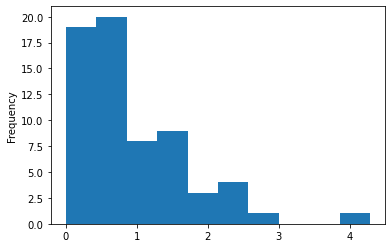

In [49]:
neg_sig_slope['Average CRISPRs'].plot.hist()

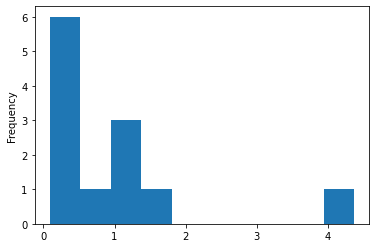

In [50]:
pos_sig_slope['Average CRISPRs'].plot.hist()

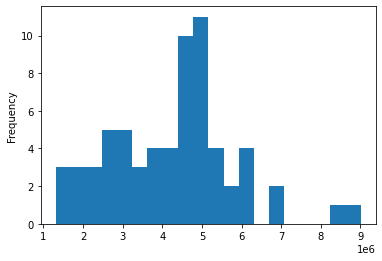

In [51]:
neg_sig_slope['Average Genome Size'].plot.hist(bins=20)

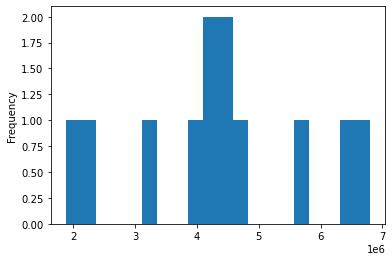

In [52]:
pos_sig_slope['Average Genome Size'].plot.hist(bins=20)

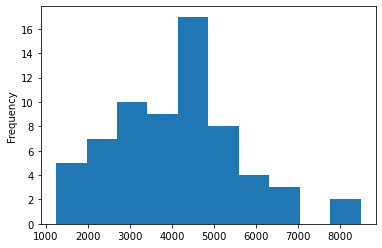

In [53]:
neg_sig_slope['Average Gene Count'].plot.hist()

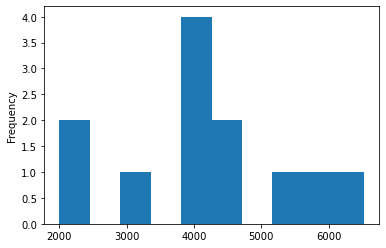

In [54]:
pos_sig_slope['Average Gene Count'].plot.hist()

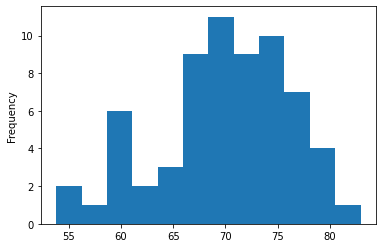

In [55]:
neg_sig_slope['Average Genes in COG'].plot.hist(bins=12)

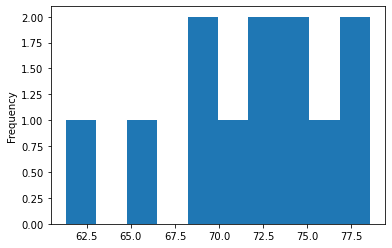

In [56]:
pos_sig_slope['Average Genes in COG'].plot.hist(bins=10)

# Workflow with the outliers clean-up
### Interquartile Range Method


In [57]:
def remove_outlier(df_in, col_name):
    x0 = len(df_in)
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    #print(q1, q3)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    x1 = len(df_out)
    print(x0 - x1, "outliers removed")
    return df_out

In [58]:
iqr_outliers_filt_by_gen_mt10_proteobact = []

In [59]:
for gen, df in by_gen_mt10_proteobact:
    df = remove_outlier(df, 'Genome Size   * assembled')
    iqr_outliers_filt_by_gen_mt10_proteobact.append((gen, df))

1 outliers removed
1 outliers removed
0 outliers removed
9 outliers removed
202 outliers removed
3 outliers removed
4 outliers removed
2 outliers removed
0 outliers removed
15 outliers removed
0 outliers removed
3 outliers removed
1 outliers removed
0 outliers removed
9 outliers removed
0 outliers removed
0 outliers removed
0 outliers removed
2 outliers removed
0 outliers removed
0 outliers removed
1 outliers removed
1 outliers removed
0 outliers removed
0 outliers removed
5 outliers removed
3 outliers removed
3 outliers removed
9 outliers removed
1 outliers removed
5 outliers removed
0 outliers removed
1 outliers removed
32 outliers removed
131 outliers removed
0 outliers removed
0 outliers removed
28 outliers removed
4 outliers removed
0 outliers removed
1 outliers removed
2 outliers removed
1 outliers removed
3 outliers removed
3 outliers removed
0 outliers removed
3 outliers removed
0 outliers removed
9 outliers removed
5 outliers removed
9 outliers removed
3 outliers removed
1 out

In [60]:
len(iqr_outliers_filt_by_gen_mt10_proteobact[0][1])

80

In [61]:
len(by_gen_mt10_proteobact[0][1])

81

## Plotting the genera on one page

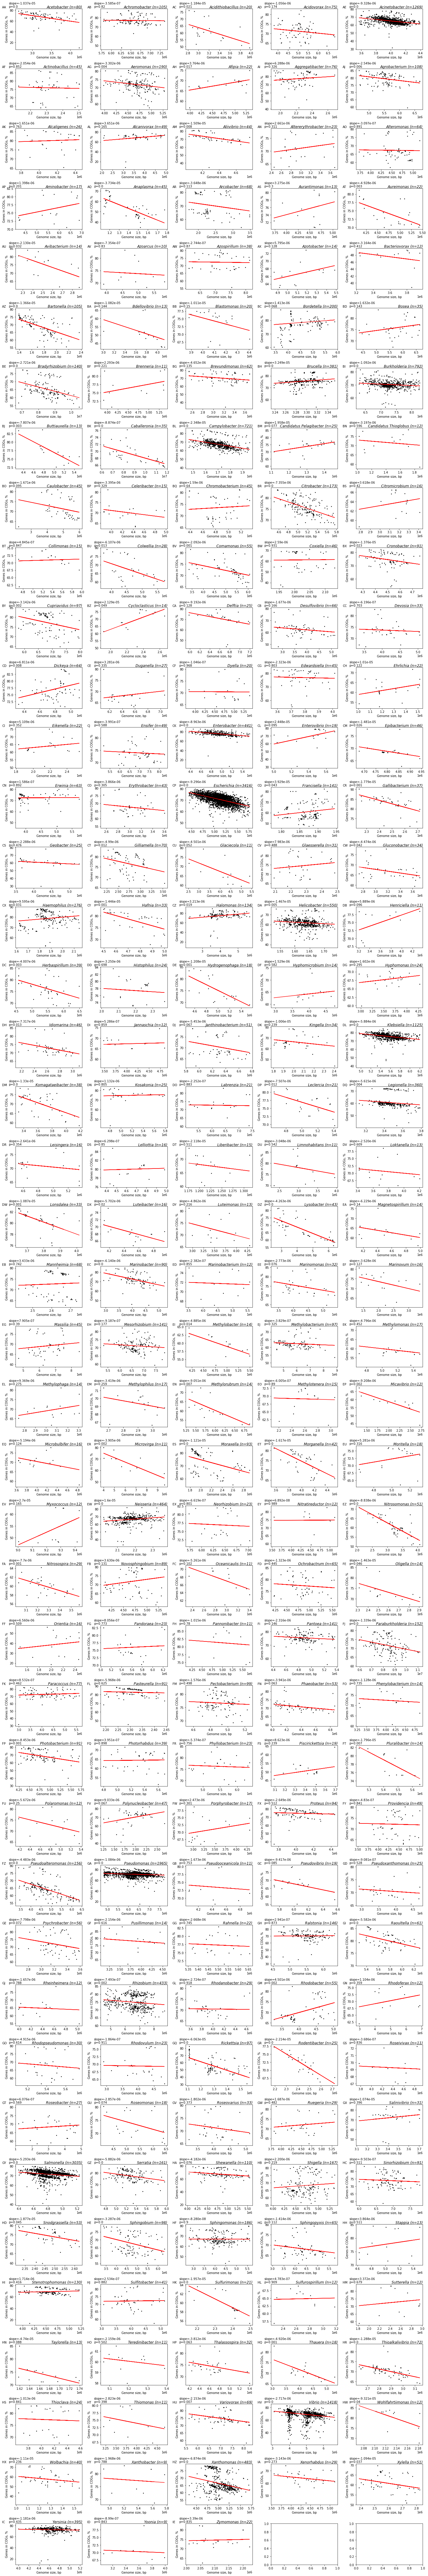

In [62]:
import math

data = iqr_outliers_filt_by_gen_mt10_proteobact
PLOTS_PER_ROW = 5
iqr_outliers_filt_series = []

i,j=0,0
fig, axs = plt.subplots(math.ceil(len(data)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 120))
for grp, dbl_lttr in zip(data, double_letters):
    x = grp[1]['Genome Size   * assembled']
    y = grp[1]['COG %   * assembled']
    genus = grp[0]
    n = len(grp[1])
    
    phylum = grp[1]['Phylum'].any()
    cls = grp[1]['Class'].any()
    order = grp[1]['Order'].any()
    family = grp[1]['Family'].any()
    min_cog_pc = grp[1]['COG %   * assembled'].min()
    max_cog_pc = grp[1]['COG %   * assembled'].max()
    min_gen_sz = grp[1]['Genome Size   * assembled'].min()
    max_gen_sz = grp[1]['Genome Size   * assembled'].max()
    avg_gen_sz = grp[1]['Genome Size   * assembled'].mean()
    avg_gene_count = grp[1]['Gene Count   * assembled'].mean()
    avg_genes_in_cogs = grp[1]['COG %   * assembled'].mean()
    avg_crispr = grp[1]['CRISPR Count   * assembled'].mean()
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ind =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Sample Size', 'Min COG %', 'Max COG %',
           'Average Genome Size', "Min Genome Size", "Max Genome Size",
           'Average Gene Count', 'Average Genes in COG',
           'Average CRISPRs', 'Slope', 'Intercept', 'R squared', 'p-value', 'Standard Error']
    iqr_outliers_filt_series.append(pd.Series([phylum, cls, order, family, genus, n, min_cog_pc, max_cog_pc,
                             avg_gen_sz, min_gen_sz, max_gen_sz,
                             avg_gene_count, avg_genes_in_cogs, 
                             avg_crispr, slope, intercept, r_value**2, p_value, std_err], index=ind))
    
    axs[i][j].scatter(x, y, s=3, c='k')
    axs[i][j].set_title(genus+" (n="+str(n)+")", loc='right', style='italic', y=0.97)
    axs[i][j].set_xlabel("Genome size, bp")
    axs[i][j].set_ylabel("Genes in COGs, %")
    axs[i][j].plot(x, intercept + slope*x, 'r')
    axs[i][j].text(-0.1, 1.01, 'p=' +  str(np.round(p_value, 3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
    axs[i][j].text(-0.1, 1.09, 'slope=' +  str(np.format_float_scientific(slope, precision=3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
    axs[i][j].text(-0.2, 1, dbl_lttr, horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
        
    #print(p_value)

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

fig.tight_layout()
plt.savefig('iqr_outliers_filt_by_gen_mt10_proteobact.pdf')
plt.show()

## Exploring the summary

In [63]:
summary_filt = pd.DataFrame(iqr_outliers_filt_series)
summary_filt

Phylum                Class                Order  \
0    Proteobacteria  Alphaproteobacteria     Rhodospirillales   
1    Proteobacteria   Betaproteobacteria      Burkholderiales   
2    Proteobacteria    Acidithiobacillia  Acidithiobacillales   
3    Proteobacteria   Betaproteobacteria      Burkholderiales   
4    Proteobacteria  Gammaproteobacteria      Pseudomonadales   
..              ...                  ...                  ...   
208  Proteobacteria  Gammaproteobacteria     Enterobacterales   
209  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
210  Proteobacteria  Gammaproteobacteria     Enterobacterales   
211  Proteobacteria  Alphaproteobacteria      Rhodobacterales   
212  Proteobacteria  Alphaproteobacteria     Sphingomonadales   

                   Family              Genus  Sample Size  Min COG %  \
0        Acetobacteraceae        Acetobacter           80      10.21   
1          Alcaligenaceae      Achromobacter          105      47.65   
2    Acidithiobacillaceae  Acidithiobacillus           20      49.21   
3          Comamonadaceae         Acidovorax           75      62.52   
4           Moraxellaceae      Acinetobacter         1269      31.47   
..                    ...                ...          ...        ...   
208        Morganellaceae        Xenorhabdus           29      44.10   
209      Xanthomonadaceae            Xylella           51      50.91   
210          Yersiniaceae           Yersinia          395      13.07   
211      Rhodobacteraceae             Yoonia            9      66.62   
212     Sphingomonadaceae          Zymomonas           22      62.52   

     Max COG %  Average Genome Size  Min Genome Size  Max Genome Size  \
0        79.31         3.267693e+06          2639223          4230529   
1        87.63         6.565032e+06          5805581          7359146   
2        76.09         3.216657e+06          2816858          3974949   
3        82.05         5.071972e+06          3796573          6820941   
4        78.06         4.004401e+06          3571990          4390137   
..         ...                  ...              ...              ...   
208      74.20         4.338738e+06          3561198          5119810   
209      69.70         2.598095e+06          2387314          2824527   
210      80.13         4.655702e+06          4000307          5185794   
211      78.92         3.550437e+06          3063691          3987360   
212      82.36         2.097891e+06          2008345          2223520   

     Average Gene Count  Average Genes in COG  Average CRISPRs         Slope  \
0           3199.375000             67.064125         1.175000 -1.037016e-05   
1           6113.942857             76.892476         0.485714 -3.584638e-07   
2           3411.550000             61.193500         1.200000 -1.184247e-05   
3           4702.226667             71.128667         0.773333 -1.056210e-06   
4           3961.111899             64.919693         0.591805 -9.327834e-06   
..                  ...                   ...              ...           ...   
208         4137.586207             63.945862         2.620690 -3.142855e-06   
209         2597.254902             60.769020         0.098039 -1.093761e-05   
210         4375.313924             72.484911         1.377215 -1.180979e-06   
211         3602.333333             70.330000         0.444444 -8.989889e-07   
212         1897.409091             74.567273         3.090909  3.389783e-06   

      Intercept  R squared       p-value  Standard Error  
0    100.950630   0.164776  1.871490e-04    2.643584e-06  
1     79.245803   0.000508  8.195356e-01    1.567221e-06  
2     99.286670   0.263222  2.070144e-02    4.669963e-06  
3     76.485735   0.025193  1.737843e-01    7.689623e-07  
4    102.272082   0.144301  7.836708e-45    6.381430e-07  
..          ...        ...           ...             ...  
208   77.581889   0.044231  2.734959e-01    2.811618e-06  
209   89.185969   0.086167  3.655977e-02    5.088458e-06 

In [64]:
neg_sig_slope_filt = summary_filt.loc[(summary_filt['p-value'] < 0.05) & (summary_filt['Slope'] < 0)]

In [65]:
pos_sig_slope_filt = summary_filt.loc[(summary_filt['p-value'] < 0.05) & (summary_filt['Slope'] > 0)]

In [66]:
summary_filt.loc[summary_filt['Slope'] > 0]

Phylum                  Class              Order  \
7    Proteobacteria    Alphaproteobacteria        Rhizobiales   
8    Proteobacteria    Gammaproteobacteria     Pasteurellales   
10   Proteobacteria     Betaproteobacteria    Burkholderiales   
11   Proteobacteria    Gammaproteobacteria  Oceanospirillales   
13   Proteobacteria    Alphaproteobacteria   Sphingomonadales   
..              ...                    ...                ...   
190  Proteobacteria    Gammaproteobacteria    Xanthomonadales   
191  Proteobacteria    Alphaproteobacteria    Rhodobacterales   
193  Proteobacteria  Epsilonproteobacteria  Campylobacterales   
194  Proteobacteria     Betaproteobacteria    Burkholderiales   
212  Proteobacteria    Alphaproteobacteria   Sphingomonadales   

                 Family               Genus  Sample Size  Min COG %  \
7     Bradyrhizobiaceae              Afipia           22      56.79   
8       Pasteurellaceae     Aggregatibacter           76      41.72   
10       Alcaligenaceae         Alcaligenes           26      65.29   
11     Alcanivoracaceae         Alcanivorax           49       8.13   
13   Erythrobacteraceae  Altererythrobacter           23      63.62   
..                  ...                 ...          ...        ...   
190    Xanthomonadaceae    Stenotrophomonas          130      14.09   
191    Rhodobacteraceae       Sulfitobacter           41      57.24   
193  Campylobacteraceae    Sulfurospirillum           12      56.84   
194      Sutterellaceae          Sutterella           12      58.86   
212   Sphingomonadaceae           Zymomonas           22      62.52   

     Max COG %  Average Genome Size  Min Genome Size  Max Genome Size  \
7        74.92         4.817459e+06          3971756          5326151   
8        87.51         2.223938e+06          1918287          2687710   
10       85.62         4.167933e+06          3772970          4443529   
11       83.66         3.689585e+06          2081251          4928223   
13       78.09         3.021245e+06          2449438          3692460   
..         ...                  ...              ...              ...   
190      78.90         4.550778e+06          3913774          5214364   
191      82.05         4.066012e+06          3073791          5121602   
193      69.00         2.686886e+06          2264828          3175729   
194      83.40         2.529163e+06          1815481          2958117   
212      82.36         2.097891e+06          2008345          2223520   

     Average Gene Count  Average Genes in COG  Average CRISPRs         Slope  \
7           4704.318182             68.435455         0.500000  3.763546e-06   
8           2237.631579             77.274211         1.513158  6.287860e-06   
10          3903.423077             80.015000         0.500000  1.651337e-06   
11          3571.224490             68.674286         1.061224  3.650779e-06   
13          2966.652174             71.163043         0.173913  2.661151e-06   
..                  ...                   ...              ...           ...   
190         4243.861538             68.976923         0.638462  1.714427e-06   
191         4038.926829             72.069756         0.292683  2.534219e-07   
193         2781.666667             64.822500         0.750000  4.783256e-07   
194         2244.916667             72.831667         1.333333  3.371765e-06   
212         1897.409091             74.567273         3.090909  3.389783e-06   

     Intercept  R squared   p-value  Standard Error  
7    50.304726   0.252441  0.017172        0.000001  
8    63.290399   0.013052  0.325764        0.000006  
10   73.132337   0.003861  0.762984        0.000005  
11   55.204425   0.040631  0.164868        0.000003  
13   63.123055   0.048797  0.311106        0.000003  
..         ...        ...       ...             ...  
190  61.174948   0.005171  0.416187        0.000002  
191  71.039340   0.000576  0.881590        0.000002  
193  63.537294   0.001366  0.909196        0.000004  
1

In [67]:
summary_filt.loc[summary_filt['Slope'] < 0]

Phylum                Class                Order  \
0    Proteobacteria  Alphaproteobacteria     Rhodospirillales   
1    Proteobacteria   Betaproteobacteria      Burkholderiales   
2    Proteobacteria    Acidithiobacillia  Acidithiobacillales   
3    Proteobacteria   Betaproteobacteria      Burkholderiales   
4    Proteobacteria  Gammaproteobacteria      Pseudomonadales   
..              ...                  ...                  ...   
207  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
208  Proteobacteria  Gammaproteobacteria     Enterobacterales   
209  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
210  Proteobacteria  Gammaproteobacteria     Enterobacterales   
211  Proteobacteria  Alphaproteobacteria      Rhodobacterales   

                   Family              Genus  Sample Size  Min COG %  \
0        Acetobacteraceae        Acetobacter           80      10.21   
1          Alcaligenaceae      Achromobacter          105      47.65   
2    Acidithiobacillaceae  Acidithiobacillus           20      49.21   
3          Comamonadaceae         Acidovorax           75      62.52   
4           Moraxellaceae      Acinetobacter         1269      31.47   
..                    ...                ...          ...        ...   
207      Xanthomonadaceae        Xanthomonas          483      52.97   
208        Morganellaceae        Xenorhabdus           29      44.10   
209      Xanthomonadaceae            Xylella           51      50.91   
210          Yersiniaceae           Yersinia          395      13.07   
211      Rhodobacteraceae             Yoonia            9      66.62   

     Max COG %  Average Genome Size  Min Genome Size  Max Genome Size  \
0        79.31         3.267693e+06          2639223          4230529   
1        87.63         6.565032e+06          5805581          7359146   
2        76.09         3.216657e+06          2816858          3974949   
3        82.05         5.071972e+06          3796573          6820941   
4        78.06         4.004401e+06          3571990          4390137   
..         ...                  ...              ...              ...   
207      78.50         5.053535e+06          4328441          5710499   
208      74.20         4.338738e+06          3561198          5119810   
209      69.70         2.598095e+06          2387314          2824527   
210      80.13         4.655702e+06          4000307          5185794   
211      78.92         3.550437e+06          3063691          3987360   

     Average Gene Count  Average Genes in COG  Average CRISPRs         Slope  \
0           3199.375000             67.064125         1.175000 -1.037016e-05   
1           6113.942857             76.892476         0.485714 -3.584638e-07   
2           3411.550000             61.193500         1.200000 -1.184247e-05   
3           4702.226667             71.128667         0.773333 -1.056210e-06   
4           3961.111899             64.919693         0.591805 -9.327834e-06   
..                  ...                   ...              ...           ...   
207         4448.548654             66.076128         0.681159 -6.874227e-06   
208         4137.586207             63.945862         2.620690 -3.142855e-06   
209         2597.254902             60.769020         0.098039 -1.093761e-05   
210         4375.313924             72.484911         1.377215 -1.180979e-06   
211         3602.333333             70.330000         0.444444 -8.989889e-07   

      Intercept  R squared       p-value  Standard Error  
0    100.950630   0.164776  1.871490e-04    2.643584e-06  
1     79.245803   0.000508  8.195356e-01    1.567221e-06  
2     99.286670   0.263222  2.070144e-02    4.669963e-06  
3     76.485735   0.025193  1.737843e-01    7.689623e-07  
4    102.272082   0.144301  7.836708e-45    6.381430e-07  
..          ...        ...           ...             ...  
207  100.815277   0.079054  3.162668e-10    1.069808e-06  
208   77.581889   0.044231  2.734959e-01    2.811618e-06 

In [68]:
62/len(summary_filt)

0.29107981220657275

In [69]:
151/len(summary_filt)

0.7089201877934272

In [70]:
len(neg_sig_slope_filt)/len(summary_filt)

0.323943661971831

In [71]:
len(pos_sig_slope_filt)/len(summary_filt)

0.04225352112676056

## Saving summary to file

In [72]:
summary_filt.to_csv("iqr_filt_summary_by_gen_mt10_proteobact_size_vs_cogs2.tsv", sep='\t', index=False)

## Page by page output

In [73]:
n = 20
chunked_data = [iqr_outliers_filt_by_gen_mt10_proteobact[i:i + n] for i in range(0, len(iqr_outliers_filt_by_gen_mt10_proteobact), n)]

In [74]:
len(chunked_data[10])

13

In [75]:
chunked_data[10]

[('Thioclava',
                Domain Sequencing Status  \
  taxon_oid                                
  2843009564  Bacteria   Permanent Draft   
  2663762756  Bacteria   Permanent Draft   
  2843013340  Bacteria   Permanent Draft   
  2846228124  Bacteria   Permanent Draft   
  2626541687  Bacteria   Permanent Draft   
  2585427678  Bacteria   Permanent Draft   
  2846231944  Bacteria   Permanent Draft   
  2835248453  Bacteria   Permanent Draft   
  2585427702  Bacteria   Permanent Draft   
  2840406337  Bacteria   Permanent Draft   
  2837451666  Bacteria   Permanent Draft   
  2751185746  Bacteria          Finished   
  2841936788  Bacteria   Permanent Draft   
  2751185743  Bacteria   Permanent Draft   
  2840410516  Bacteria   Permanent Draft   
  2602041541  Bacteria   Permanent Draft   
  2846223937  Bacteria   Permanent Draft   
  2615840522  Bacteria   Permanent Draft   
  2846219649  Bacteria   Permanent Draft   
  2788500421  Bacteria   Permanent Draft   
  2846211663  Bac

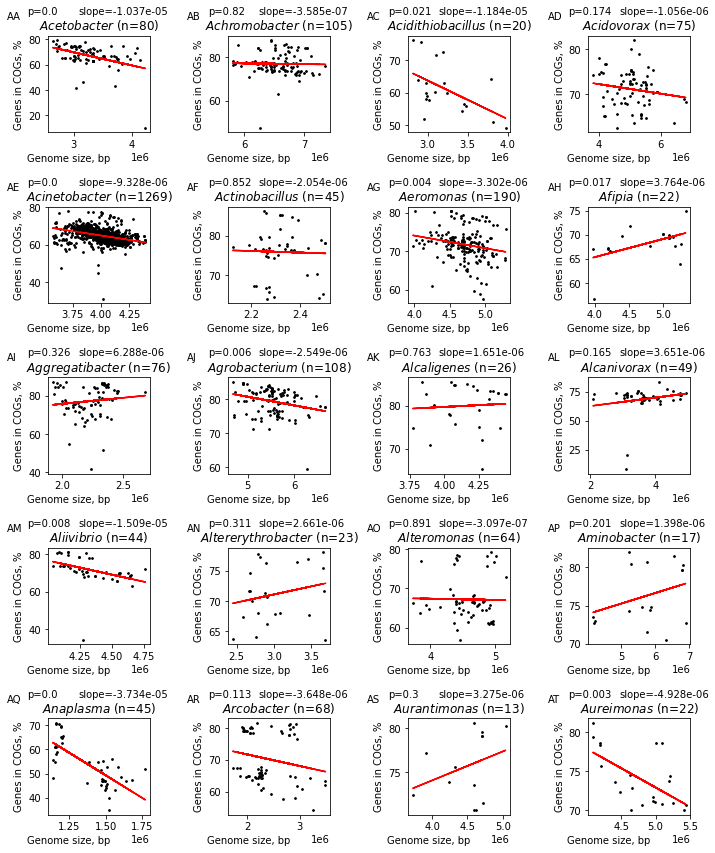

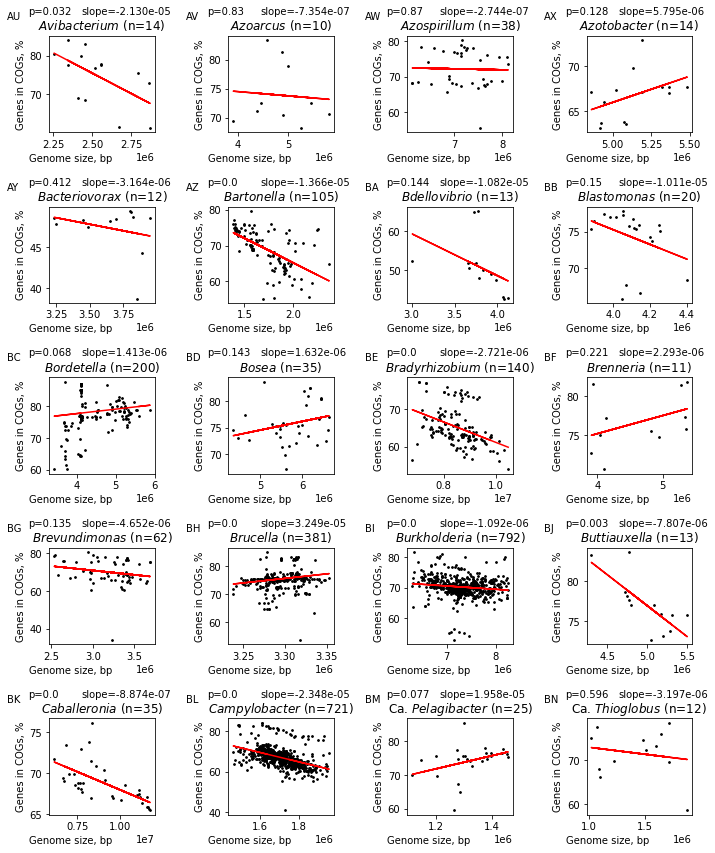

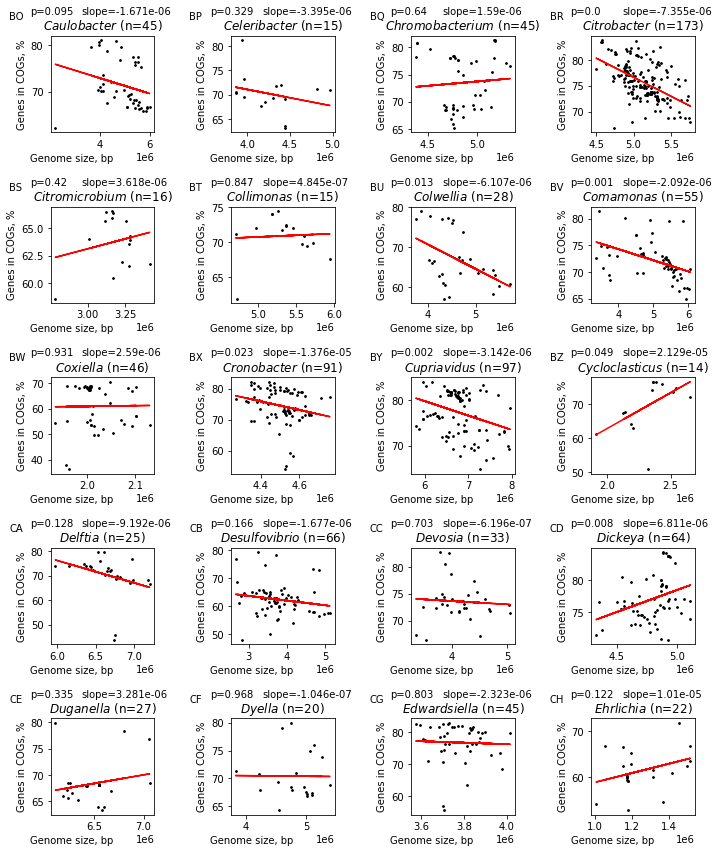

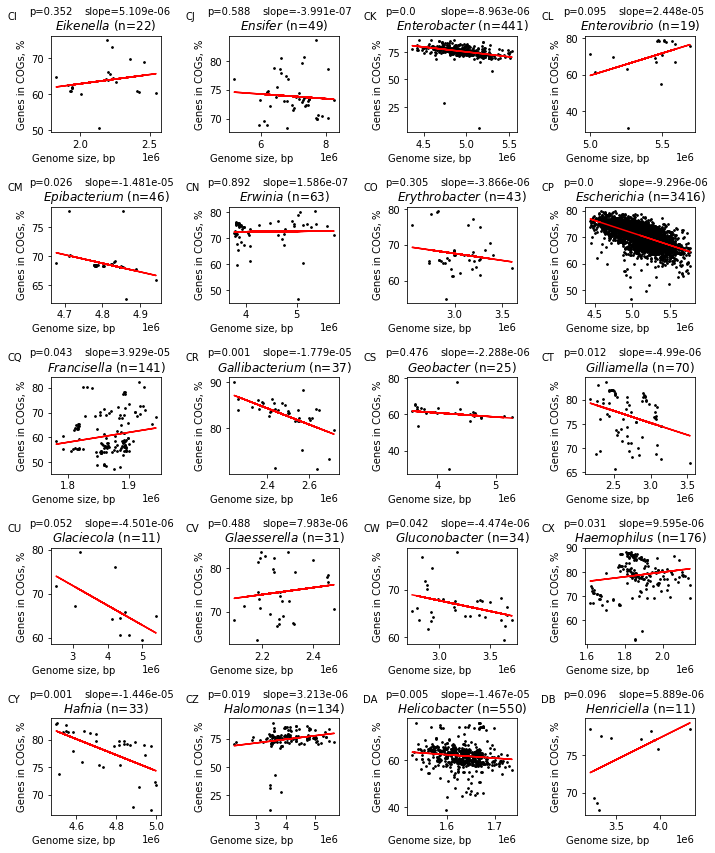

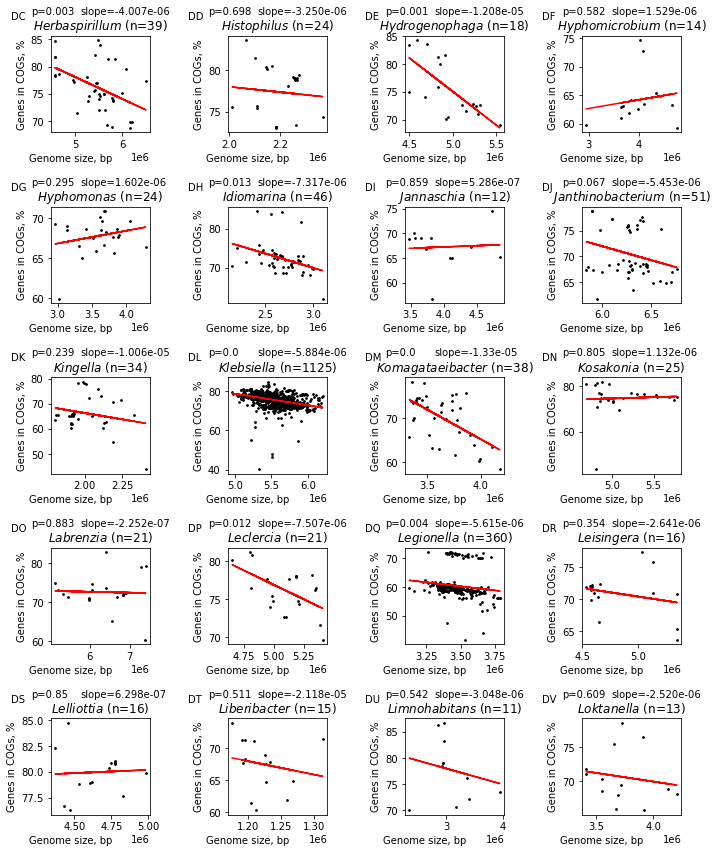

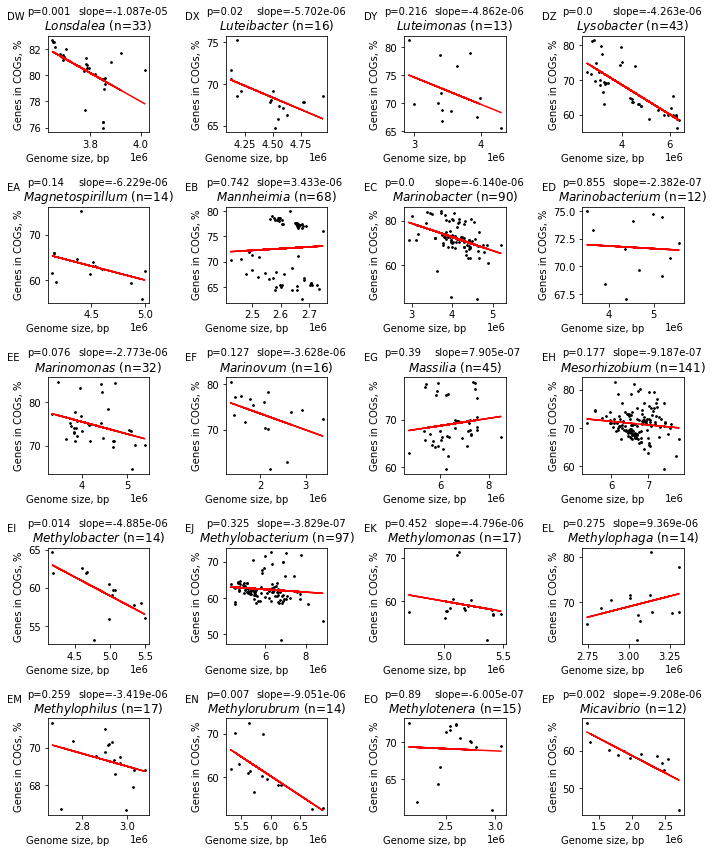

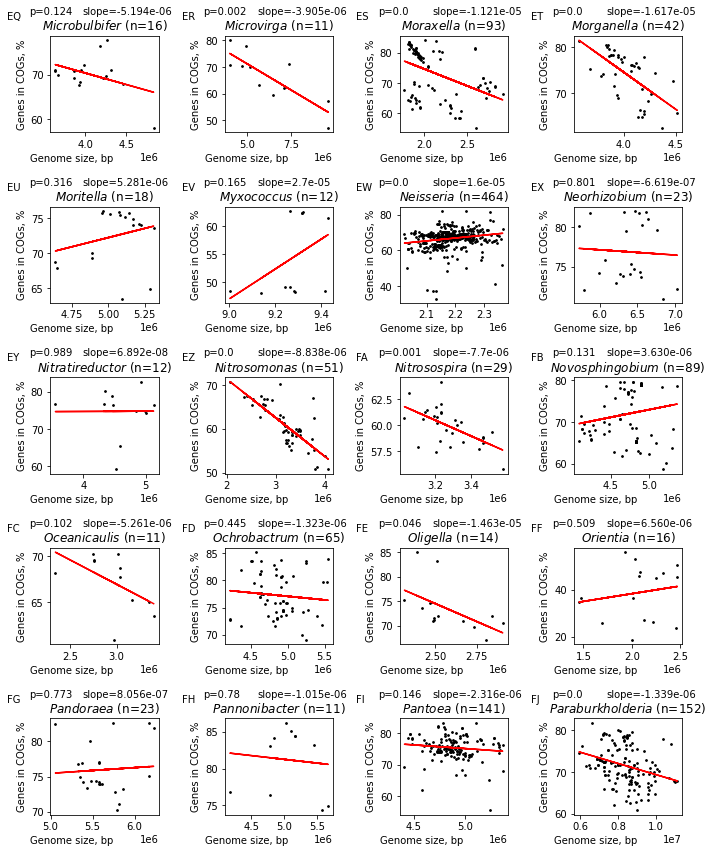

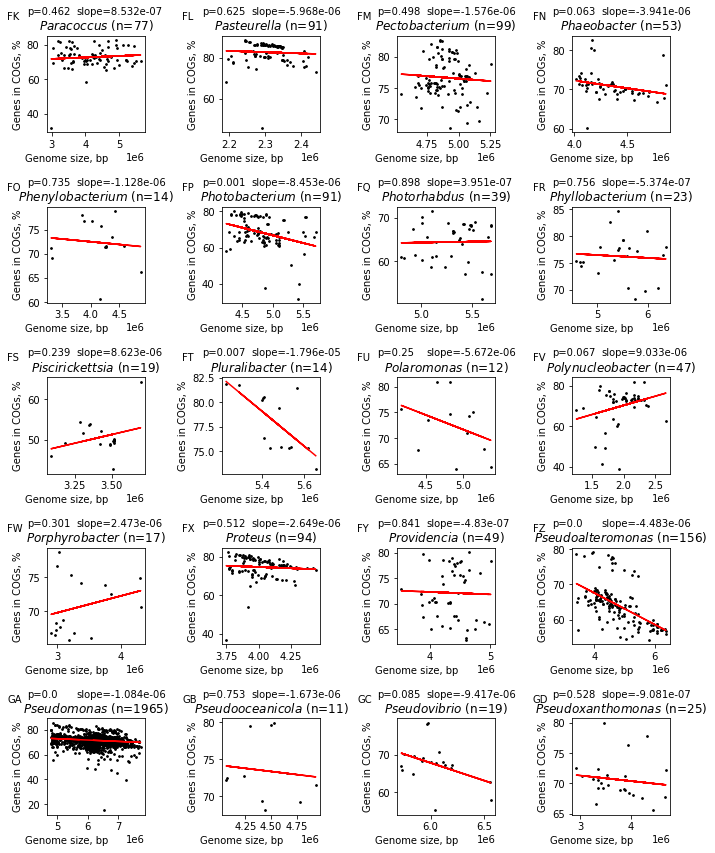

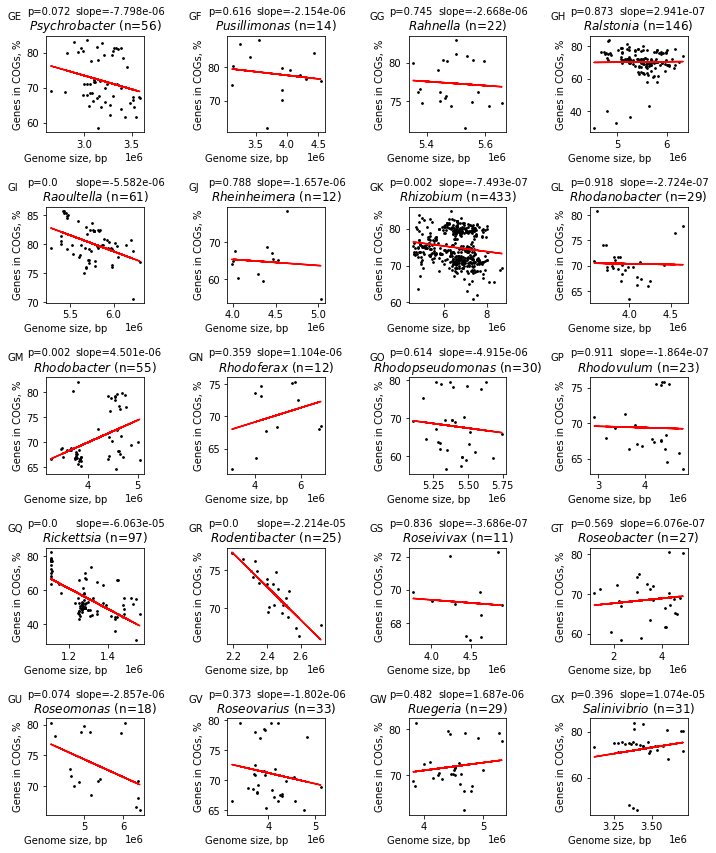

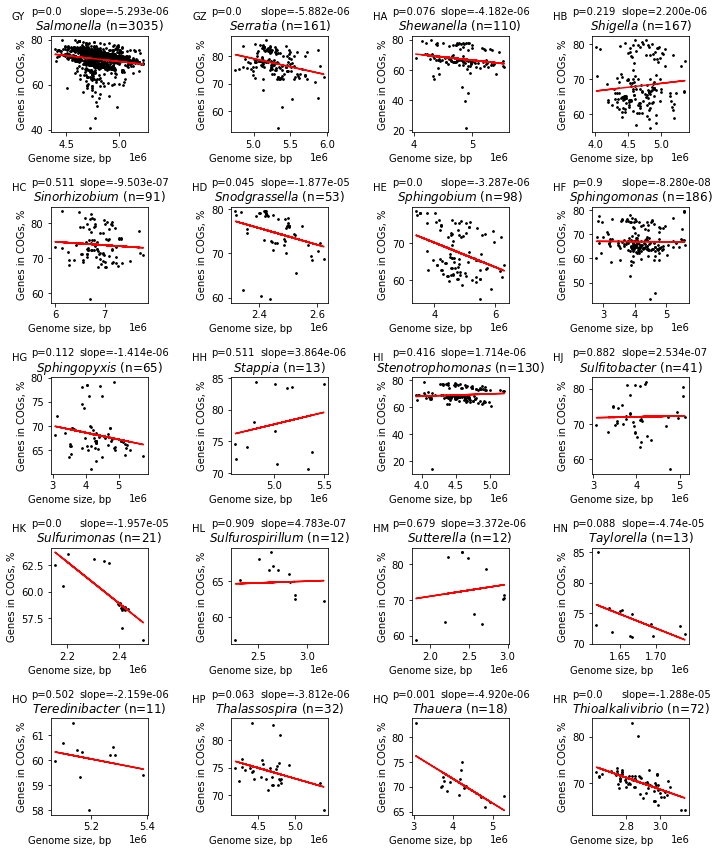

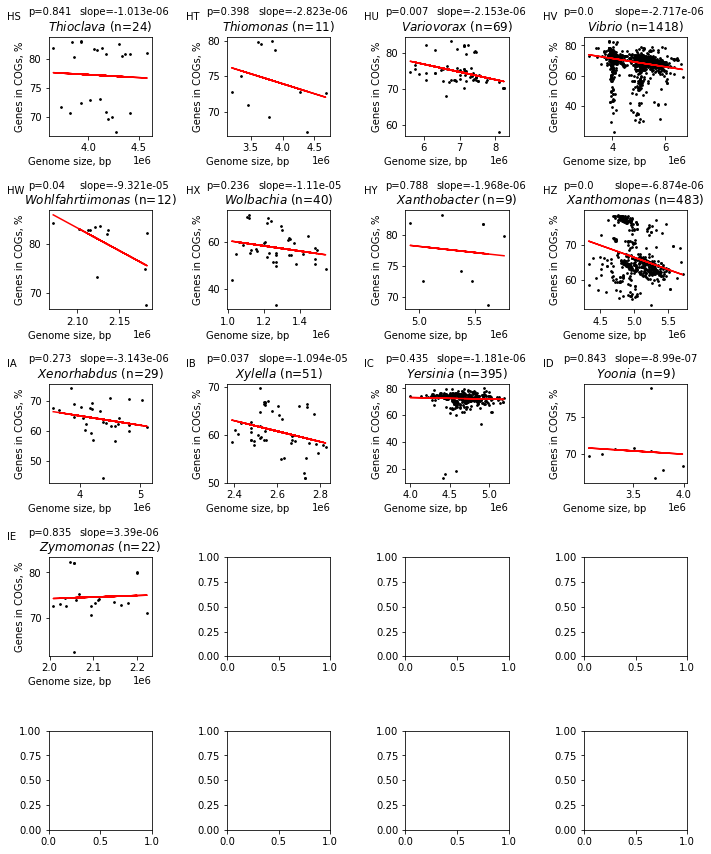

In [80]:
import math
double_letters_it = iter(double_letters)
#data = by_gen_outliers_filt_then_mt10
PLOTS_PER_ROW = 4
iqr_outliers_filt_series = []
    
for page_num, data in enumerate(chunked_data):
    i,j=0,0
    #fig, axs = plt.subplots(math.ceil(len(data)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10,12))
    fig, axs = plt.subplots(5 ,4, figsize=(10,12))
    #fix to get the same height graphs on the last page 
    
        
    for grp in data:
        dbl_lttr = next(double_letters_it)
        x = grp[1]['Genome Size   * assembled']
        y = grp[1]['COG %   * assembled']
        genus = grp[0].replace("Candidatus ", "Ca. ")
        n = len(grp[1])

        phylum = grp[1]['Phylum'].any()
        cls = grp[1]['Class'].any()
        order = grp[1]['Order'].any()
        family = grp[1]['Family'].any()
        min_cog_pc = grp[1]['COG %   * assembled'].min()
        max_cog_pc = grp[1]['COG %   * assembled'].max()
        avg_gen_sz = grp[1]['Genome Size   * assembled'].mean()
        avg_gene_count = grp[1]['Gene Count   * assembled'].mean()
        avg_genes_in_cogs = grp[1]['COG %   * assembled'].mean()
        avg_crispr = grp[1]['CRISPR Count   * assembled'].mean()
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        ind =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Sample Size', 'Min COG %', 'Max COG %',
               'Average Genome Size', 'Average Gene Count', 'Average Genes in COG',
               'Average CRISPRs', 'Slope', 'Intercept', 'R squared', 'p-value', 'Standard Error']
        iqr_outliers_filt_series.append(pd.Series([phylum, cls, order, family, genus, n, min_cog_pc, max_cog_pc,
                                 avg_gen_sz, avg_gene_count, avg_genes_in_cogs, 
                                 avg_crispr, slope, intercept, r_value**2, p_value, std_err], index=ind))

        axs[i][j].scatter(x, y, s=3, c='k')
        #"Normal text $\it{Italics}$"
        splt = genus.split()
        if len(splt) > 1:
            prefix, genus = splt[0], splt[1]
            axs[i][j].set_title(prefix+" $\it{"+genus+"}$ (n="+str(n)+")", loc='center')
        else:
            axs[i][j].set_title("$\it{"+genus+"}$ (n="+str(n)+")", loc='center')
        
        axs[i][j].set_xlabel("Genome size, bp", position=(0.2, 0.3))
        axs[i][j].set_ylabel("Genes in COGs, %")
        axs[i][j].plot(x, intercept + slope*x, 'r')
        axs[i][j].text(-0.2, 1.2, 'p=' +  str(np.round(p_value, 3)), horizontalalignment='left',
         verticalalignment='bottom', transform=axs[i][j].transAxes)
        axs[i][j].text(0.3, 1.2, 'slope=' +  str(np.format_float_scientific(slope, precision=3)), horizontalalignment='left',
         verticalalignment='bottom', transform=axs[i][j].transAxes)
        axs[i][j].text(-0.4, 1.15, dbl_lttr, horizontalalignment='left',
                       verticalalignment='bottom', transform=axs[i][j].transAxes)
        

        #print(p_value)

        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0

    fig.tight_layout()
    #plt.savefig('page'+str(page_num)+'_'+'iqr_outliers_filt_by_gen_mt10_proteobact.pdf', orientation = 'portrait', papertype = 'letter')
    plt.savefig('page'+str(page_num)+'_'+'iqr_outliers_filt_by_gen_mt10_proteobact.png',dpi=150 , orientation = 'portrait', papertype = 'letter')
    plt.show()

## Normalizing by genome the max size

## Let's clean-up the outliers
### Interquartile Range Method


In [81]:
def remove_outlier(df_in, col_name):
    x0 = len(df_in)
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    #print(q1, q3)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    x1 = len(df_out)
    print(x0 - x1, "outliers removed")
    return df_out

In [82]:
iqr_outliers_filt_max_norm_by_gen_mt10_proteobact = []

In [83]:
for gen, df in by_gen_mt10_proteobact:
    df = remove_outlier(df, 'Genome Size   * assembled')
    iqr_outliers_filt_max_norm_by_gen_mt10_proteobact.append((gen, df))

1 outliers removed
1 outliers removed
0 outliers removed
9 outliers removed
202 outliers removed
3 outliers removed
4 outliers removed
2 outliers removed
0 outliers removed
15 outliers removed
0 outliers removed
3 outliers removed
1 outliers removed
0 outliers removed
9 outliers removed
0 outliers removed
0 outliers removed
0 outliers removed
2 outliers removed
0 outliers removed
0 outliers removed
1 outliers removed
1 outliers removed
0 outliers removed
0 outliers removed
5 outliers removed
3 outliers removed
3 outliers removed
9 outliers removed
1 outliers removed
5 outliers removed
0 outliers removed
1 outliers removed
32 outliers removed
131 outliers removed
0 outliers removed
0 outliers removed
28 outliers removed
4 outliers removed
0 outliers removed
1 outliers removed
2 outliers removed
1 outliers removed
3 outliers removed
3 outliers removed
0 outliers removed
3 outliers removed
0 outliers removed
9 outliers removed
5 outliers removed
9 outliers removed
3 outliers removed
1 out

In [84]:
len(iqr_outliers_filt_max_norm_by_gen_mt10_proteobact[0][1])

80

In [85]:
len(by_gen_mt10_proteobact[0][1])

81

## Plotting the genera on one page

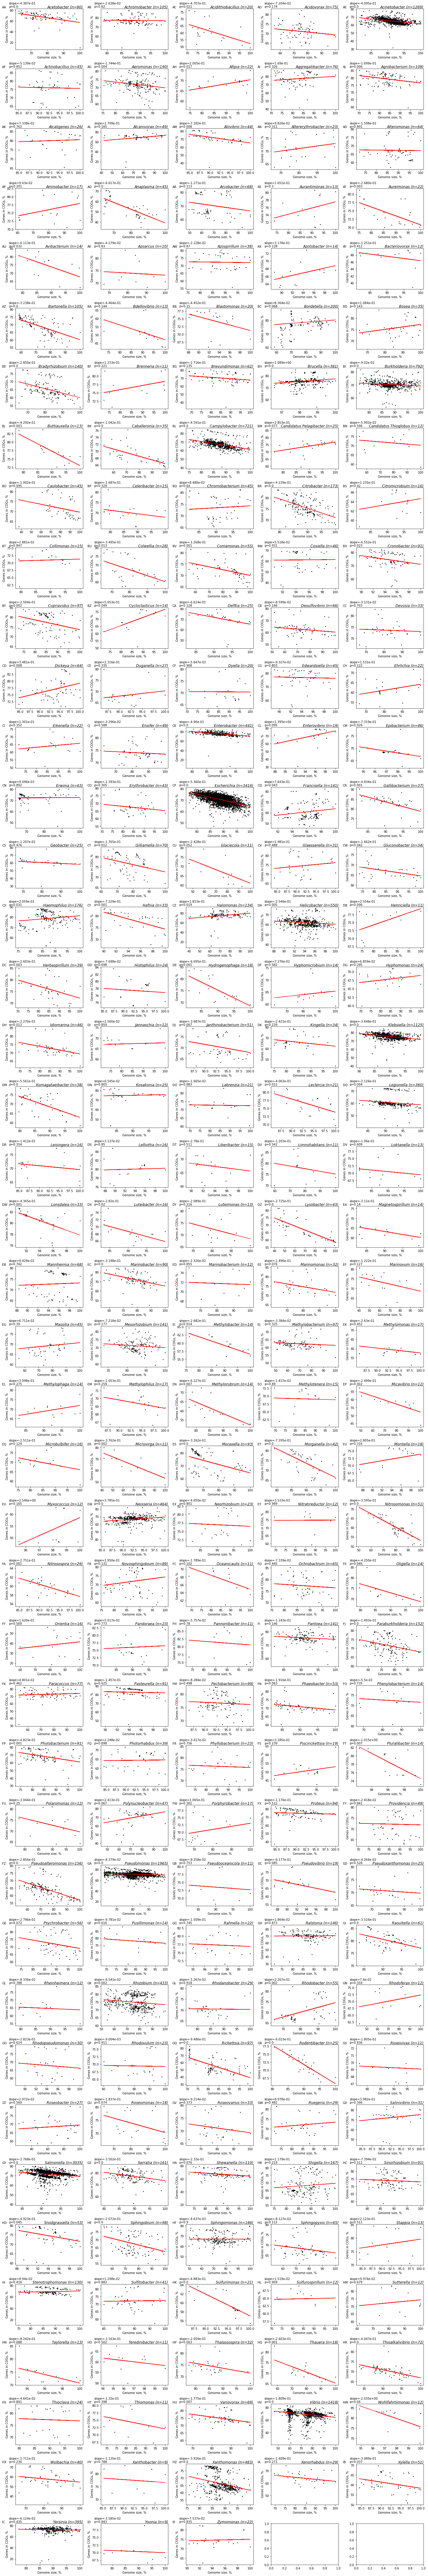

In [86]:
import math

data = iqr_outliers_filt_by_gen_mt10_proteobact
PLOTS_PER_ROW = 5
iqr_norm_outliers_filt_series = []

i,j=0,0
fig, axs = plt.subplots(math.ceil(len(data)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 120))
for grp, dbl_lttr in zip(data, double_letters):
    x = grp[1]['Genome Size   * assembled'] * 100 / grp[1]['Genome Size   * assembled'].max()
    y = grp[1]['COG %   * assembled']
    genus = grp[0]
    n = len(grp[1])
    
    phylum = grp[1]['Phylum'].any()
    cls = grp[1]['Class'].any()
    order = grp[1]['Order'].any()
    family = grp[1]['Family'].any()
    min_cog_pc = grp[1]['COG %   * assembled'].min()
    max_cog_pc = grp[1]['COG %   * assembled'].max()
    min_gen_sz = grp[1]['Genome Size   * assembled'].min()
    max_gen_sz = grp[1]['Genome Size   * assembled'].max()
    avg_gen_sz = grp[1]['Genome Size   * assembled'].mean()
    avg_gene_count = grp[1]['Gene Count   * assembled'].mean()
    avg_genes_in_cogs = grp[1]['COG %   * assembled'].mean()
    avg_crispr = grp[1]['CRISPR Count   * assembled'].mean()
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ind =['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Sample Size', 'Min COG %', 'Max COG %',
           'Average Genome Size', "Min Genome Size", "Max Genome Size",
           'Average Gene Count', 'Average Genes in COG',
           'Average CRISPRs', 'Slope', 'Intercept', 'R squared', 'p-value', 'Standard Error']
    iqr_norm_outliers_filt_series.append(pd.Series([phylum, cls, order, family, genus, n, min_cog_pc, max_cog_pc,
                             avg_gen_sz, min_gen_sz, max_gen_sz,
                             avg_gene_count, avg_genes_in_cogs, 
                             avg_crispr, slope, intercept, r_value**2, p_value, std_err], index=ind))
    
    axs[i][j].scatter(x, y, s=3, c='k')
    axs[i][j].set_title(genus+" (n="+str(n)+")", loc='right', style='italic', y=0.97)
    axs[i][j].set_xlabel("Genome size, %")
    axs[i][j].set_ylabel("Genes in COGs, %")
    axs[i][j].plot(x, intercept + slope*x, 'r')
    axs[i][j].text(-0.1, 1.01, 'p=' +  str(np.round(p_value, 3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
    axs[i][j].text(-0.1, 1.09, 'slope=' +  str(np.format_float_scientific(slope, precision=3)), horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
    axs[i][j].text(-0.2, 1, dbl_lttr, horizontalalignment='left',
     verticalalignment='bottom', transform=axs[i][j].transAxes)
        
    #print(p_value)

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

fig.tight_layout()
plt.savefig('norm_iqr_outliers_filt_by_gen_mt10_proteobact.pdf')
plt.show()

## Exploring summary

In [87]:
norm_summary_filt = pd.DataFrame(iqr_norm_outliers_filt_series)
norm_summary_filt

Phylum                Class                Order  \
0    Proteobacteria  Alphaproteobacteria     Rhodospirillales   
1    Proteobacteria   Betaproteobacteria      Burkholderiales   
2    Proteobacteria    Acidithiobacillia  Acidithiobacillales   
3    Proteobacteria   Betaproteobacteria      Burkholderiales   
4    Proteobacteria  Gammaproteobacteria      Pseudomonadales   
..              ...                  ...                  ...   
208  Proteobacteria  Gammaproteobacteria     Enterobacterales   
209  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
210  Proteobacteria  Gammaproteobacteria     Enterobacterales   
211  Proteobacteria  Alphaproteobacteria      Rhodobacterales   
212  Proteobacteria  Alphaproteobacteria     Sphingomonadales   

                   Family              Genus  Sample Size  Min COG %  \
0        Acetobacteraceae        Acetobacter           80      10.21   
1          Alcaligenaceae      Achromobacter          105      47.65   
2    Acidithiobacillaceae  Acidithiobacillus           20      49.21   
3          Comamonadaceae         Acidovorax           75      62.52   
4           Moraxellaceae      Acinetobacter         1269      31.47   
..                    ...                ...          ...        ...   
208        Morganellaceae        Xenorhabdus           29      44.10   
209      Xanthomonadaceae            Xylella           51      50.91   
210          Yersiniaceae           Yersinia          395      13.07   
211      Rhodobacteraceae             Yoonia            9      66.62   
212     Sphingomonadaceae          Zymomonas           22      62.52   

     Max COG %  Average Genome Size  Min Genome Size  Max Genome Size  \
0        79.31         3.267693e+06          2639223          4230529   
1        87.63         6.565032e+06          5805581          7359146   
2        76.09         3.216657e+06          2816858          3974949   
3        82.05         5.071972e+06          3796573          6820941   
4        78.06         4.004401e+06          3571990          4390137   
..         ...                  ...              ...              ...   
208      74.20         4.338738e+06          3561198          5119810   
209      69.70         2.598095e+06          2387314          2824527   
210      80.13         4.655702e+06          4000307          5185794   
211      78.92         3.550437e+06          3063691          3987360   
212      82.36         2.097891e+06          2008345          2223520   

     Average Gene Count  Average Genes in COG  Average CRISPRs     Slope  \
0           3199.375000             67.064125         1.175000 -0.438713   
1           6113.942857             76.892476         0.485714 -0.026380   
2           3411.550000             61.193500         1.200000 -0.470732   
3           4702.226667             71.128667         0.773333 -0.072043   
4           3961.111899             64.919693         0.591805 -0.409505   
..                  ...                   ...              ...       ...   
208         4137.586207             63.945862         2.620690 -0.160908   
209         2597.254902             60.769020         0.098039 -0.308936   
210         4375.313924             72.484911         1.377215 -0.061243   
211         3602.333333             70.330000         0.444444 -0.035846   
212         1897.409091             74.567273         3.090909  0.075373   

      Intercept  R squared       p-value  Standard Error  
0    100.950630   0.164776  1.871490e-04        0.111838  
1     79.245803   0.000508  8.195356e-01        0.115334  
2     99.286670   0.263222  2.070144e-02        0.185629  
3     76.485735   0.025193  1.737843e-01        0.052450  
4    102.272082   0.144301  7.836708e-45        0.028015  
..          ...        ...           ...             ...  
208   77.581889   0.044231  2.734959e-01        0.143950  
209   89.185969   0.086167  3.655977e-02        0.143725  
210   77.983198   0.001551  4.350715e-01      

In [88]:
norm_neg_sig_slope_filt = norm_summary_filt.loc[(norm_summary_filt['p-value'] < 0.05) & (norm_summary_filt['Slope'] < 0)]

In [89]:
norm_pos_sig_slope_filt = norm_summary_filt.loc[(norm_summary_filt['p-value'] < 0.05) & (norm_summary_filt['Slope'] > 0)]

In [90]:
norm_summary_filt.loc[norm_summary_filt['Slope'] > 0]

Phylum                  Class              Order  \
7    Proteobacteria    Alphaproteobacteria        Rhizobiales   
8    Proteobacteria    Gammaproteobacteria     Pasteurellales   
10   Proteobacteria     Betaproteobacteria    Burkholderiales   
11   Proteobacteria    Gammaproteobacteria  Oceanospirillales   
13   Proteobacteria    Alphaproteobacteria   Sphingomonadales   
..              ...                    ...                ...   
190  Proteobacteria    Gammaproteobacteria    Xanthomonadales   
191  Proteobacteria    Alphaproteobacteria    Rhodobacterales   
193  Proteobacteria  Epsilonproteobacteria  Campylobacterales   
194  Proteobacteria     Betaproteobacteria    Burkholderiales   
212  Proteobacteria    Alphaproteobacteria   Sphingomonadales   

                 Family               Genus  Sample Size  Min COG %  \
7     Bradyrhizobiaceae              Afipia           22      56.79   
8       Pasteurellaceae     Aggregatibacter           76      41.72   
10       Alcaligenaceae         Alcaligenes           26      65.29   
11     Alcanivoracaceae         Alcanivorax           49       8.13   
13   Erythrobacteraceae  Altererythrobacter           23      63.62   
..                  ...                 ...          ...        ...   
190    Xanthomonadaceae    Stenotrophomonas          130      14.09   
191    Rhodobacteraceae       Sulfitobacter           41      57.24   
193  Campylobacteraceae    Sulfurospirillum           12      56.84   
194      Sutterellaceae          Sutterella           12      58.86   
212   Sphingomonadaceae           Zymomonas           22      62.52   

     Max COG %  Average Genome Size  Min Genome Size  Max Genome Size  \
7        74.92         4.817459e+06          3971756          5326151   
8        87.51         2.223938e+06          1918287          2687710   
10       85.62         4.167933e+06          3772970          4443529   
11       83.66         3.689585e+06          2081251          4928223   
13       78.09         3.021245e+06          2449438          3692460   
..         ...                  ...              ...              ...   
190      78.90         4.550778e+06          3913774          5214364   
191      82.05         4.066012e+06          3073791          5121602   
193      69.00         2.686886e+06          2264828          3175729   
194      83.40         2.529163e+06          1815481          2958117   
212      82.36         2.097891e+06          2008345          2223520   

     Average Gene Count  Average Genes in COG  Average CRISPRs     Slope  \
7           4704.318182             68.435455         0.500000  0.200452   
8           2237.631579             77.274211         1.513158  0.168999   
10          3903.423077             80.015000         0.500000  0.073378   
11          3571.224490             68.674286         1.061224  0.179919   
13          2966.652174             71.163043         0.173913  0.098262   
..                  ...                   ...              ...       ...   
190         4243.861538             68.976923         0.638462  0.089396   
191         4038.926829             72.069756         0.292683  0.012979   
193         2781.666667             64.822500         0.750000  0.015190   
194         2244.916667             72.831667         1.333333  0.099741   
212         1897.409091             74.567273         3.090909  0.075373   

     Intercept  R squared   p-value  Standard Error  
7    50.304726   0.252441  0.017172        0.077133  
8    63.290399   0.013052  0.325764        0.170836  
10   73.132337   0.003861  0.762984        0.240570  
11   55.204425   0.040631  0.164868        0.127523  
13   63.123055   0.048797  0.311106        0.094671  
..         ...        ...       ...             ...  
190  61.174948   0.005171  0.416187        0.109595  
191  71.039340   0.000576  0.881590        0.086567  
193  63.537294   0.001366  0.909196        0.129860  
194  64.303922   0.017804  0.679302        0.2342

In [91]:
norm_summary_filt.loc[norm_summary_filt['Slope'] < 0]

Phylum                Class                Order  \
0    Proteobacteria  Alphaproteobacteria     Rhodospirillales   
1    Proteobacteria   Betaproteobacteria      Burkholderiales   
2    Proteobacteria    Acidithiobacillia  Acidithiobacillales   
3    Proteobacteria   Betaproteobacteria      Burkholderiales   
4    Proteobacteria  Gammaproteobacteria      Pseudomonadales   
..              ...                  ...                  ...   
207  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
208  Proteobacteria  Gammaproteobacteria     Enterobacterales   
209  Proteobacteria  Gammaproteobacteria      Xanthomonadales   
210  Proteobacteria  Gammaproteobacteria     Enterobacterales   
211  Proteobacteria  Alphaproteobacteria      Rhodobacterales   

                   Family              Genus  Sample Size  Min COG %  \
0        Acetobacteraceae        Acetobacter           80      10.21   
1          Alcaligenaceae      Achromobacter          105      47.65   
2    Acidithiobacillaceae  Acidithiobacillus           20      49.21   
3          Comamonadaceae         Acidovorax           75      62.52   
4           Moraxellaceae      Acinetobacter         1269      31.47   
..                    ...                ...          ...        ...   
207      Xanthomonadaceae        Xanthomonas          483      52.97   
208        Morganellaceae        Xenorhabdus           29      44.10   
209      Xanthomonadaceae            Xylella           51      50.91   
210          Yersiniaceae           Yersinia          395      13.07   
211      Rhodobacteraceae             Yoonia            9      66.62   

     Max COG %  Average Genome Size  Min Genome Size  Max Genome Size  \
0        79.31         3.267693e+06          2639223          4230529   
1        87.63         6.565032e+06          5805581          7359146   
2        76.09         3.216657e+06          2816858          3974949   
3        82.05         5.071972e+06          3796573          6820941   
4        78.06         4.004401e+06          3571990          4390137   
..         ...                  ...              ...              ...   
207      78.50         5.053535e+06          4328441          5710499   
208      74.20         4.338738e+06          3561198          5119810   
209      69.70         2.598095e+06          2387314          2824527   
210      80.13         4.655702e+06          4000307          5185794   
211      78.92         3.550437e+06          3063691          3987360   

     Average Gene Count  Average Genes in COG  Average CRISPRs     Slope  \
0           3199.375000             67.064125         1.175000 -0.438713   
1           6113.942857             76.892476         0.485714 -0.026380   
2           3411.550000             61.193500         1.200000 -0.470732   
3           4702.226667             71.128667         0.773333 -0.072043   
4           3961.111899             64.919693         0.591805 -0.409505   
..                  ...                   ...              ...       ...   
207         4448.548654             66.076128         0.681159 -0.392553   
208         4137.586207             63.945862         2.620690 -0.160908   
209         2597.254902             60.769020         0.098039 -0.308936   
210         4375.313924             72.484911         1.377215 -0.061243   
211         3602.333333             70.330000         0.444444 -0.035846   

      Intercept  R squared       p-value  Standard Error  
0    100.950630   0.164776  1.871490e-04        0.111838  
1     79.245803   0.000508  8.195356e-01        0.115334  
2     99.286670   0.263222  2.070144e-02        0.185629  
3     76.485735   0.025193  1.737843e-01        0.052450  
4    102.272082   0.144301  7.836708e-45        0.028015  
..          ...        ...           ...             ...  
207  100.815277   0.079054  3.162668e-10        0.061091  
208   77.581889   0.044231  2.734959e-01        0.143950  
209   89.185969   0.086167  3.655977e-02      

In [92]:
62/len(norm_summary_filt)

0.29107981220657275

In [93]:
151/len(norm_summary_filt)

0.7089201877934272

In [94]:
len(norm_neg_sig_slope_filt)/len(norm_summary_filt)

0.323943661971831

In [95]:
len(norm_pos_sig_slope_filt)/len(norm_summary_filt)

0.04225352112676056

## Saving summary to file

In [97]:
norm_summary_filt.to_csv("norm_iqr_filt_summary_by_gen_mt10_proteobact_size_vs_cogs2.tsv", sep='\t', index=False)